# GLOBSEC

In [1]:
%matplotlib inline

import os
import pandas as pd
import math
import re
import seaborn as sns
import numpy as np
import glob
from functools import reduce

from matplotlib import pyplot as plt
import matplotlib.dates as md
from datetime import datetime,timedelta

In [2]:
import matplotlib

plt.rcParams['figure.figsize'] = 50, 10

font = {'size'   : 30}

matplotlib.rc('font', **font)

In [3]:
# # Read the sql file
# query = open('globsec_fiit.sql', 'r')

# # connection == the connection to your database, in your case prob_db
# DF = pd.read_sql_query(query.read(),connection)

# Connect

In [4]:
import mysql.connector

mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="db",
    database="globs"
)

mycursor = mydb.cursor()
print(mydb)

In [5]:
mycursor.execute("SELECT * FROM article LIMIT 1")
myresult = mycursor.fetchall()

# for x in myresult:
#     print(x)

In [6]:
from sqlalchemy import create_engine
import pymysql

db_connection_str = 'mysql+pymysql://root:db@localhost/globs'
db_connection = create_engine(db_connection_str)

# df = pd.read_sql('SELECT * FROM table_name', con=db_connection)

# Tables

Source - RSS

In [7]:
pd.read_sql('SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA="globs";', con=db_connection)

,TABLE_NAME
0,article
1,article_category
2,article_category_article
3,article_label
4,label
5,label_article_label
6,label_category
7,site


# Upload tables

In [8]:
q = 'SELECT * FROM article'
article = pd.read_sql(q, con=db_connection)

In [9]:
q = 'SELECT * FROM article_category'
article_category = pd.read_sql(q, con=db_connection)

In [10]:
q = 'SELECT * FROM article_category_article'
article_category_article = pd.read_sql(q, con=db_connection)

In [11]:
q = 'SELECT * FROM article_label'
article_label = pd.read_sql(q, con=db_connection)

In [12]:
q = 'SELECT * FROM label'
label = pd.read_sql(q, con=db_connection)

In [13]:
q = 'SELECT * FROM label_article_label'
label_article_label = pd.read_sql(q, con=db_connection)

In [14]:
q = 'SELECT * FROM label_category'
label_category = pd.read_sql(q, con=db_connection)

In [15]:
q = 'SELECT * FROM site'
site = pd.read_sql(q, con=db_connection)

In [16]:
# q = 'SELECT * FROM columns_priv'
# columns_priv = pd.read_sql(q, con=db_connection)
# columns_priv.head(5)

# Basic overview

## Article

stiahnuté články v HTML aj textovej podobe


- id
- public_id


- site_id = site


- title
- author
- url


- language
- state


- body
- original_body
- text_body


- date_created
- date_added


BASIC INFO
- n of articles = 36424
- missing author = 25517
- missing date_created = 6853
- 126 sources (sites)


In [17]:
print(len(article))
article.head(1)

36242


,id,site_id,title,body,date_created,date_added,url,author,public_id,state,original_body,text_body,language
0,25269,37,"След като опитал дивечово месо,\nВенци Мартино...","<h1 class=""prependedTitle"">След като опитал ди...",NaT,2019-05-23 22:10:54,https://www.168chasa.bg/Article/7447905,None,08ec92eedaba468b62b597d74ae7a069,unrelated,"<head>\n<meta charset=""UTF-8"">\n<meta property...","След като опитал дивечово месо,\nВенци Мартино...",bg


In [18]:
article.describe()

,id,site_id
count,36242.000000,36242.000000
mean,43389.500000,84.347525
std,10462.308565,37.816418
min,25269.000000,2.000000
25%,34329.250000,53.000000
50%,43389.500000,85.000000
75%,52449.750000,122.000000
max,61510.000000,151.000000


In [19]:
article.isnull().sum()

id                   0
site_id              0
title                0
body                 0
date_created      6853
date_added           0
url                  0
author           25517
public_id            0
state                0
original_body        0
text_body            0
language             0
dtype: int64

In [20]:
# how many sites
print('\nnumber of sites - '+str(len(article.groupby(['site_id']).count())))
# languages
print('\nnumber of languages - '+str(len(article.groupby(['language']).count())))
print(str('\n'+ str(article.groupby(['language']).count()['id'])))
# state
print('\nnumber of states - '+str(len(article.groupby(['state']).count())))
print(str('\n'+ str(article.groupby(['state']).count()['id'])))


number of sites - 126

number of languages - 8

language
bg    5962
cz    3462
hu    4484
me    4711
mk    3324
ro    4388
rs    8041
sk    1870
Name: id, dtype: int64

number of states - 5

state
grabbed              28907
labeled                589
partially_labeled       54
reprocess                6
unrelated             6686
Name: id, dtype: int64


number of articles per language


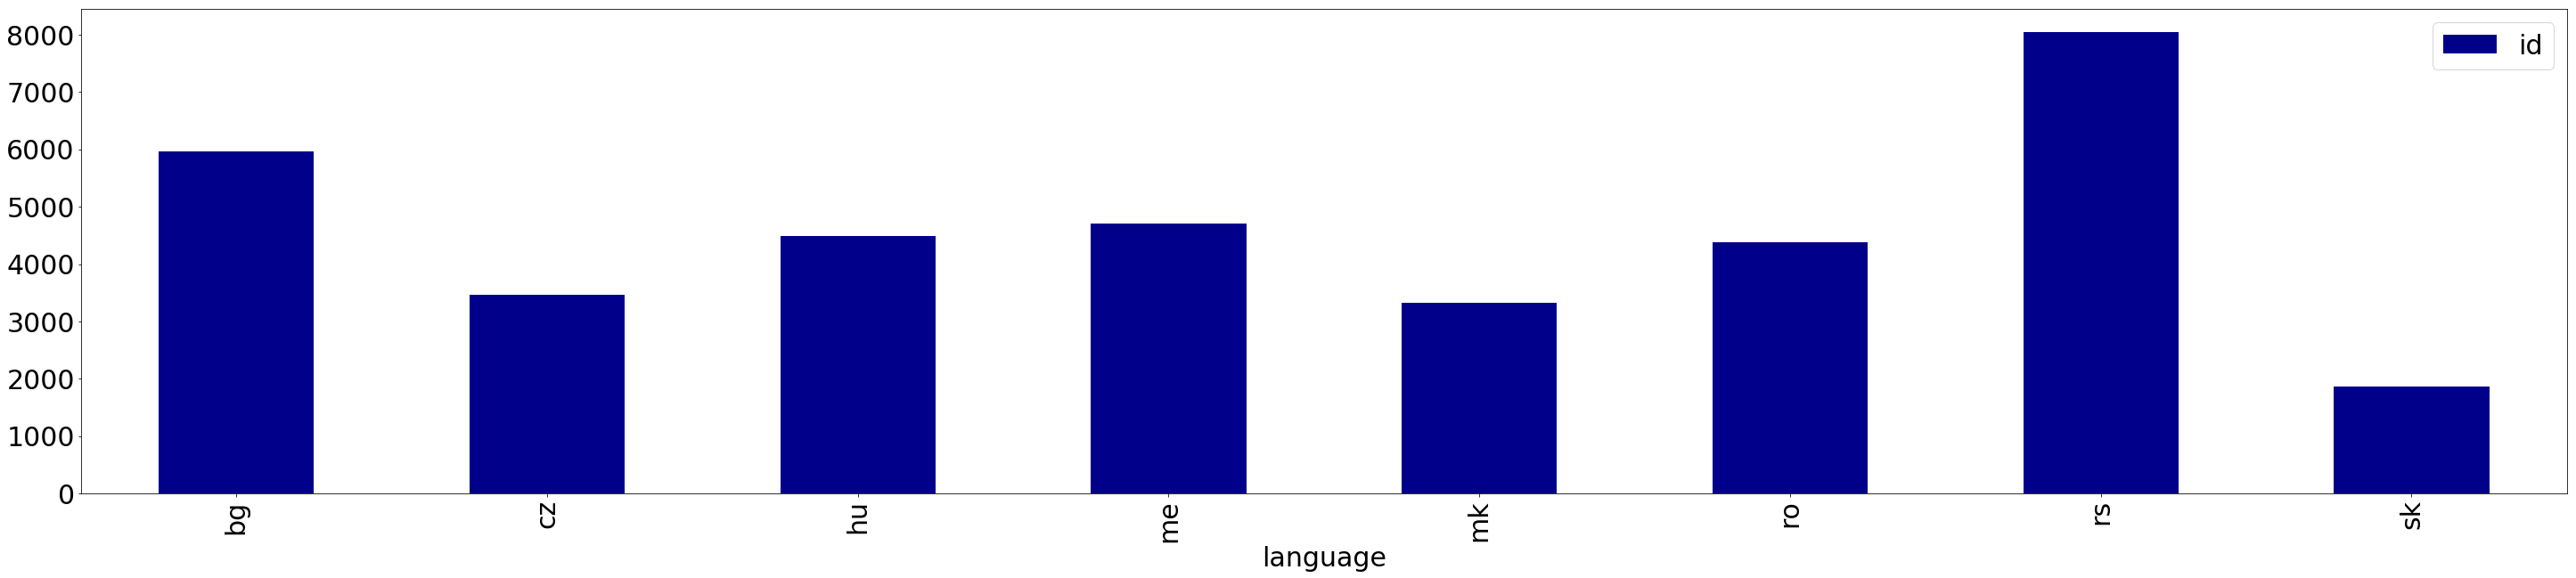

In [21]:
# number of articles per language
print('number of articles per language')
article.groupby(['language']).count()['id'].reset_index().plot.bar(x='language', y='id', color='darkblue')

number of articles per language


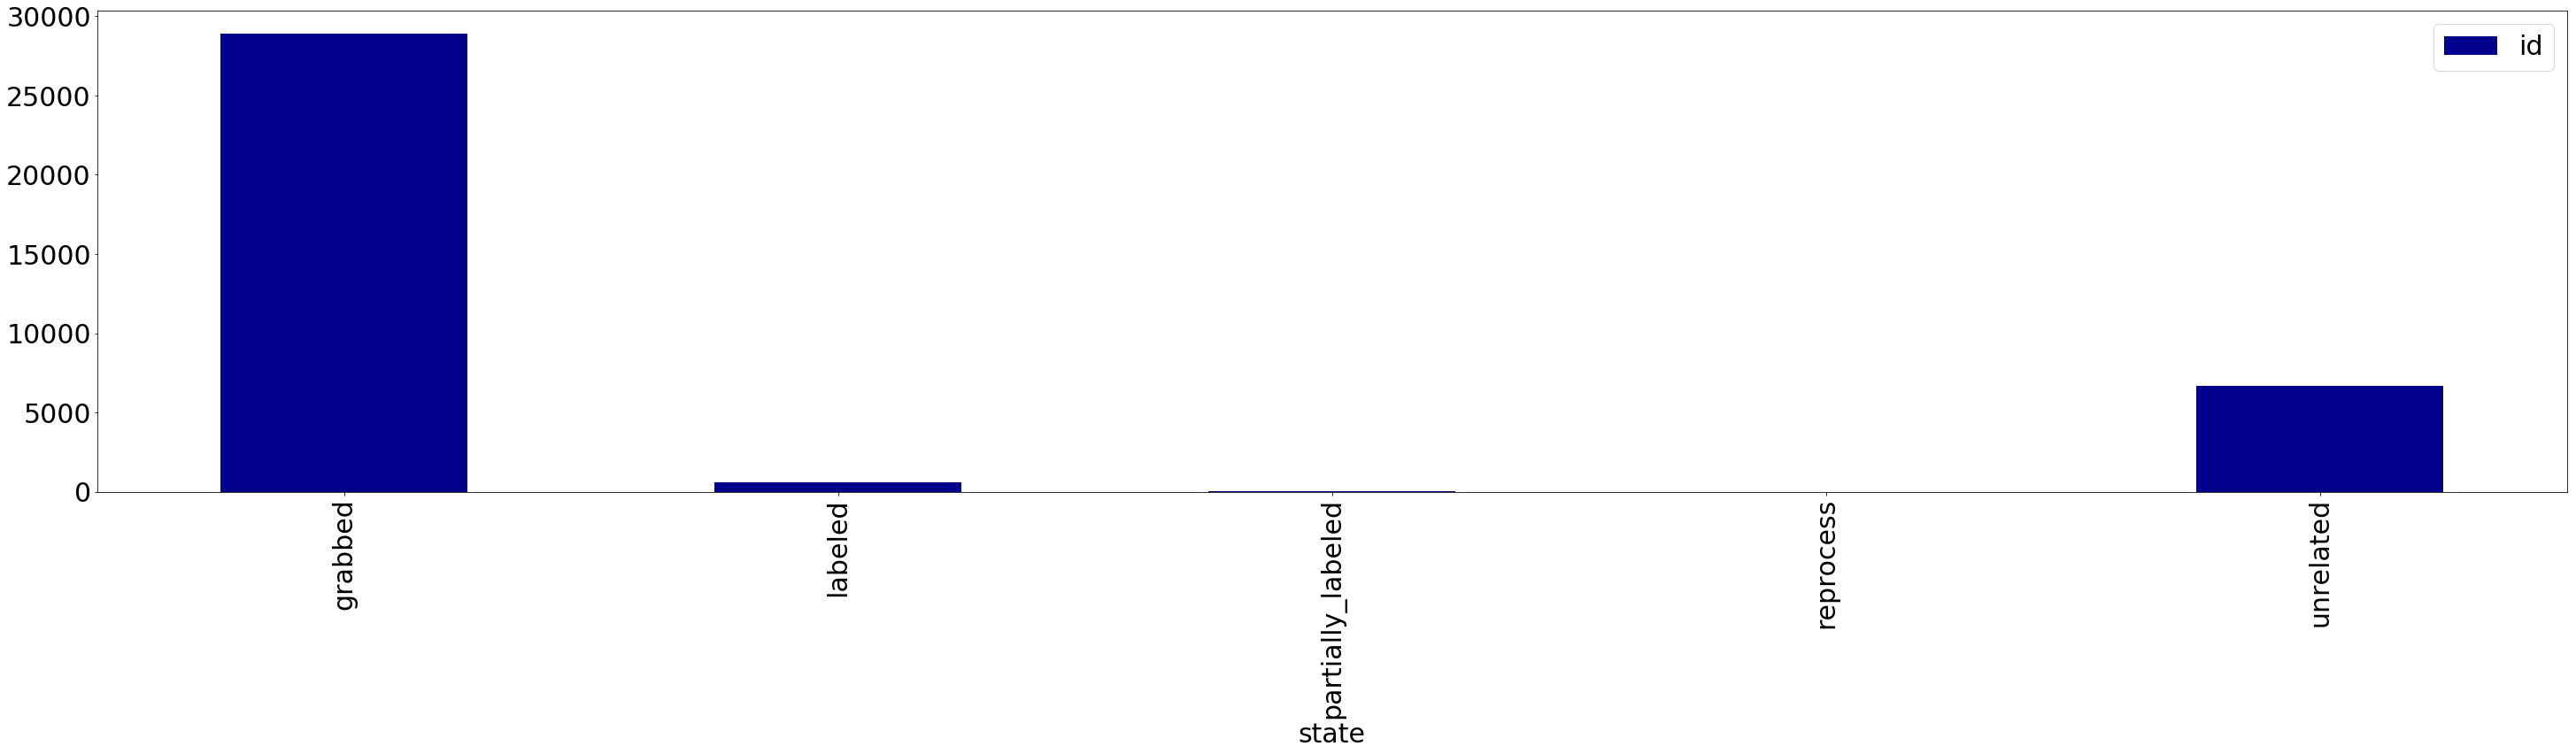

In [23]:
# number of articles per language
print('number of articles per language')
article.groupby(['state']).count()['id'].reset_index().plot.bar(x='state', y='id', color='darkblue')

In [24]:
# date_created - max and min
print('date_created range')
print(article.groupby(['date_created']).count()['id'].reset_index().sort_values(by=['date_created']).head(5))
print(article.groupby(['date_created']).count()['id'].reset_index().sort_values(by=['date_created']).tail(5))

date_created range
         date_created  id
0 2012-07-17 08:22:23   1
1 2012-07-17 10:22:23   1
2 2016-11-06 10:31:15   1
3 2016-11-06 13:18:01   1
4 2016-11-06 14:11:26   1
             date_created  id
21473 2019-07-07 17:43:00   1
21474 2019-07-07 17:44:01   1
21475 2019-07-07 17:50:00   1
21476 2019-07-07 17:56:00   1
21477 2019-07-07 17:57:00   1


   date_created_year     id
0             2012.0      2
1             2016.0     31
2             2017.0     59
3             2018.0     45
4             2019.0  29252


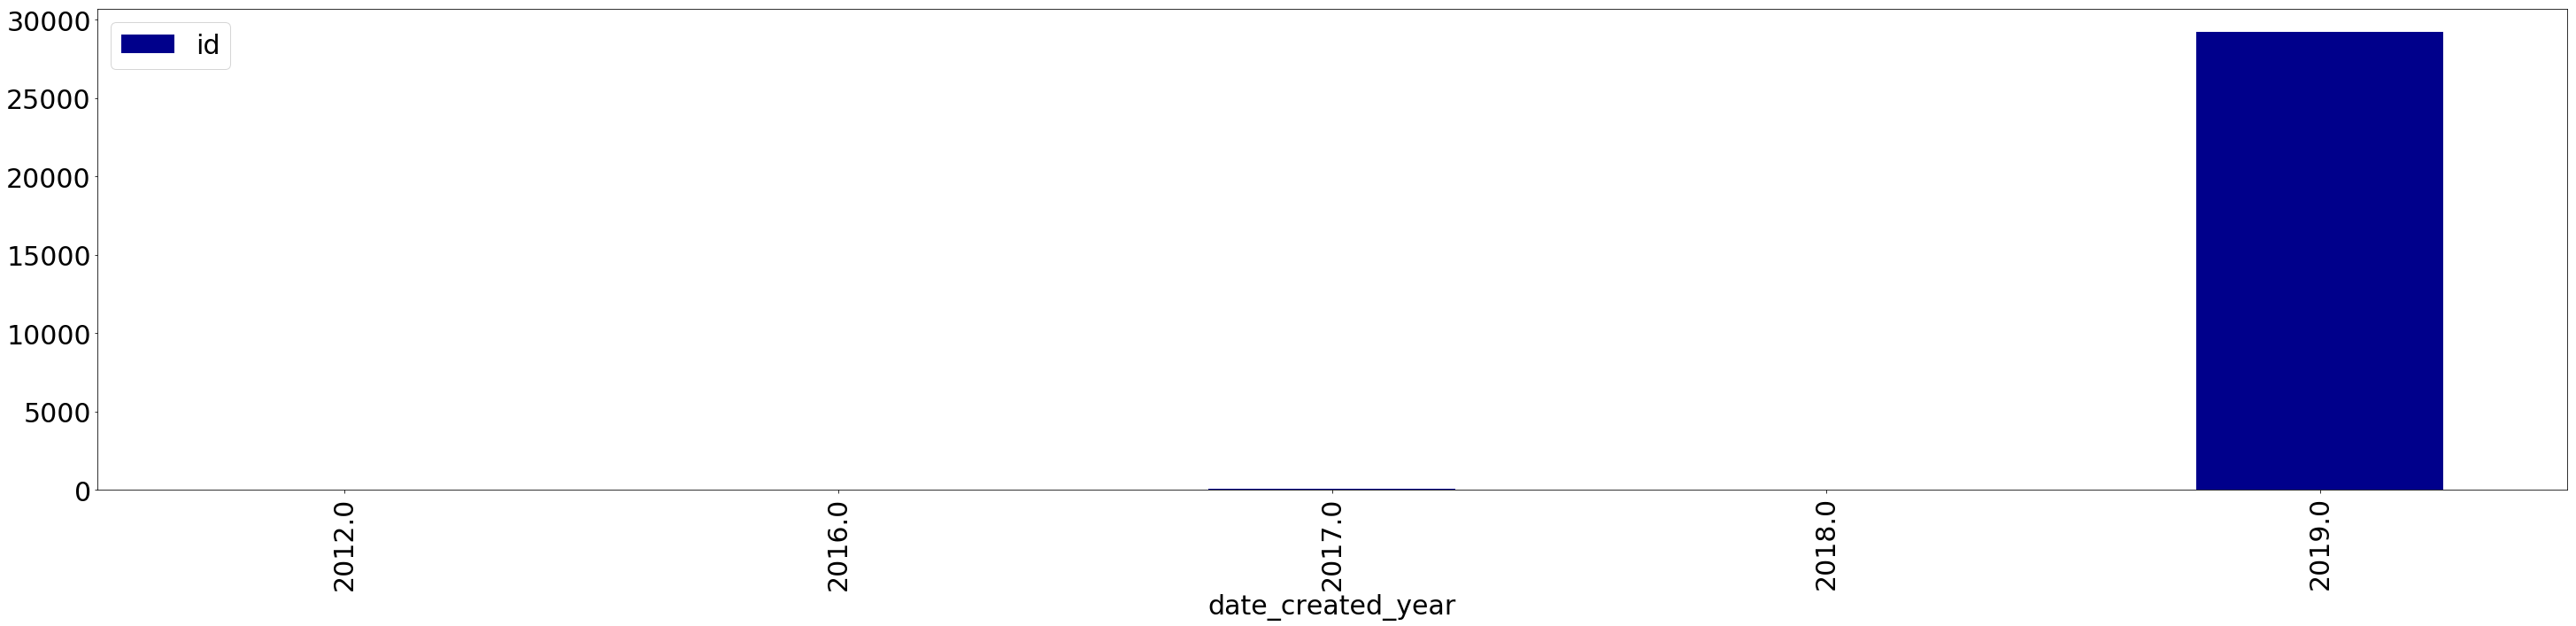

In [25]:
article['date_created_year'] = pd.DatetimeIndex(article['date_created']).year
print(article.groupby(['date_created_year']).count()['id'].reset_index().sort_values(by=['date_created_year']))
article.groupby(['date_created_year']).count()['id'].reset_index().sort_values(by=['date_created_year']).reset_index().plot.bar(x='date_created_year', y='id', color='darkblue')

In [26]:
# date_added - max and min
print(article.groupby(['date_added']).count()['id'].reset_index().sort_values(by=['date_added']).head(5))
print(article.groupby(['date_added']).count()['id'].reset_index().sort_values(by=['date_added']).tail(5))

           date_added  id
0 2019-05-23 22:10:54   9
1 2019-05-23 22:10:55  22
2 2019-05-23 22:10:56  20
3 2019-05-23 22:10:57  18
4 2019-05-23 22:10:59  15
              date_added  id
9432 2019-07-07 20:58:32   3
9433 2019-07-07 20:58:33   4
9434 2019-07-07 20:58:34   3
9435 2019-07-07 20:58:35   2
9436 2019-07-07 20:58:37   1


histogram - number of articles per a site


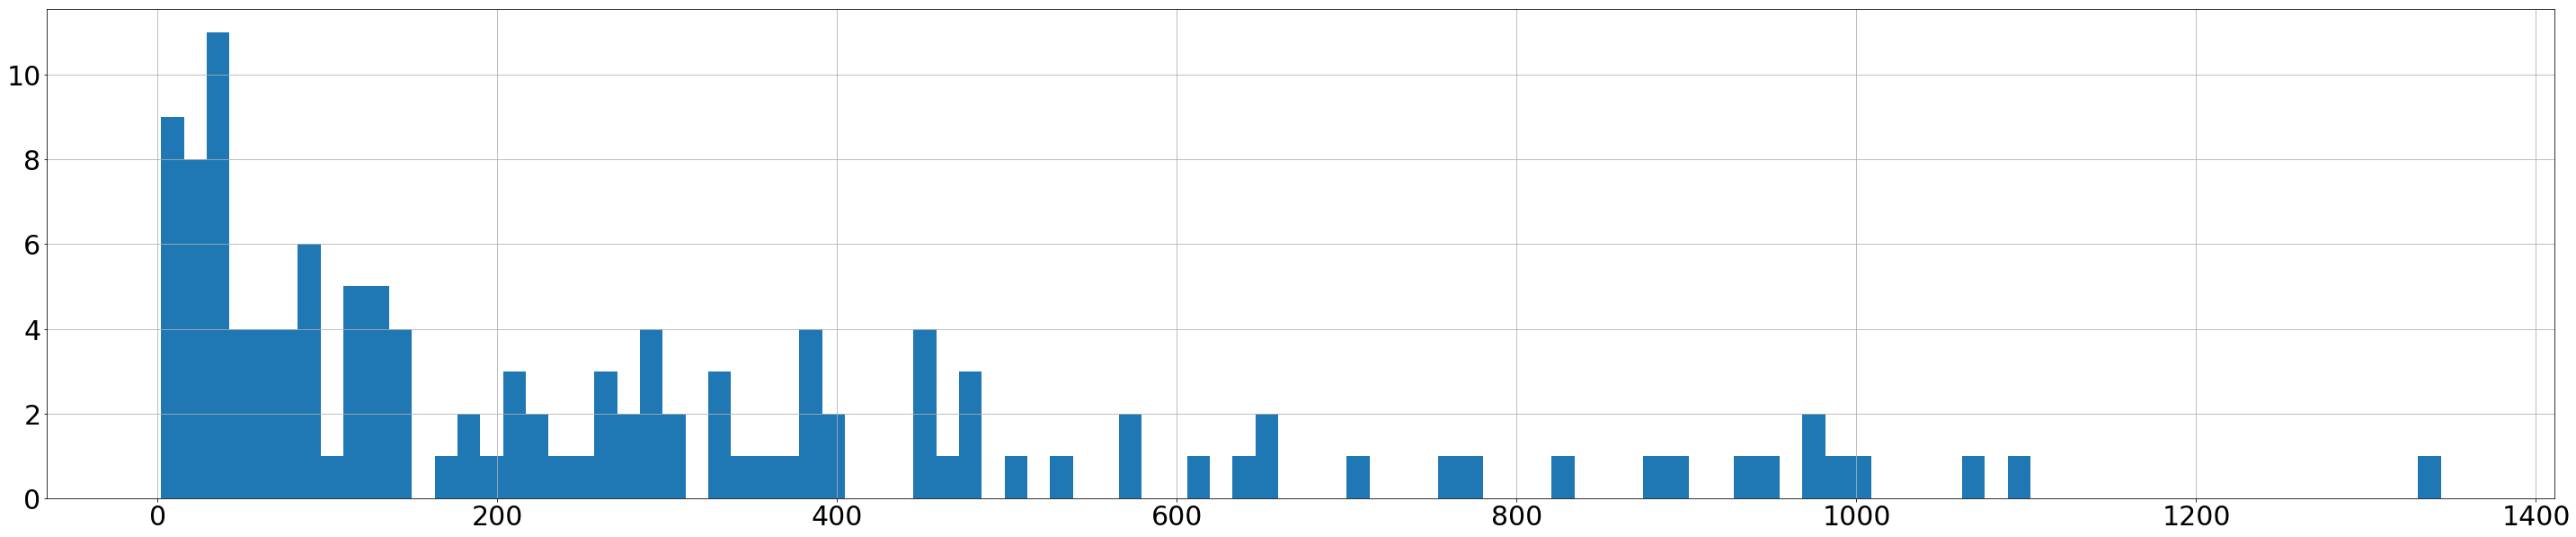

In [27]:
# number of articles per site
print('histogram - number of articles per a site')
article.groupby(['site_id']).count()['id'].hist(bins=100)

number of articles per site (id)


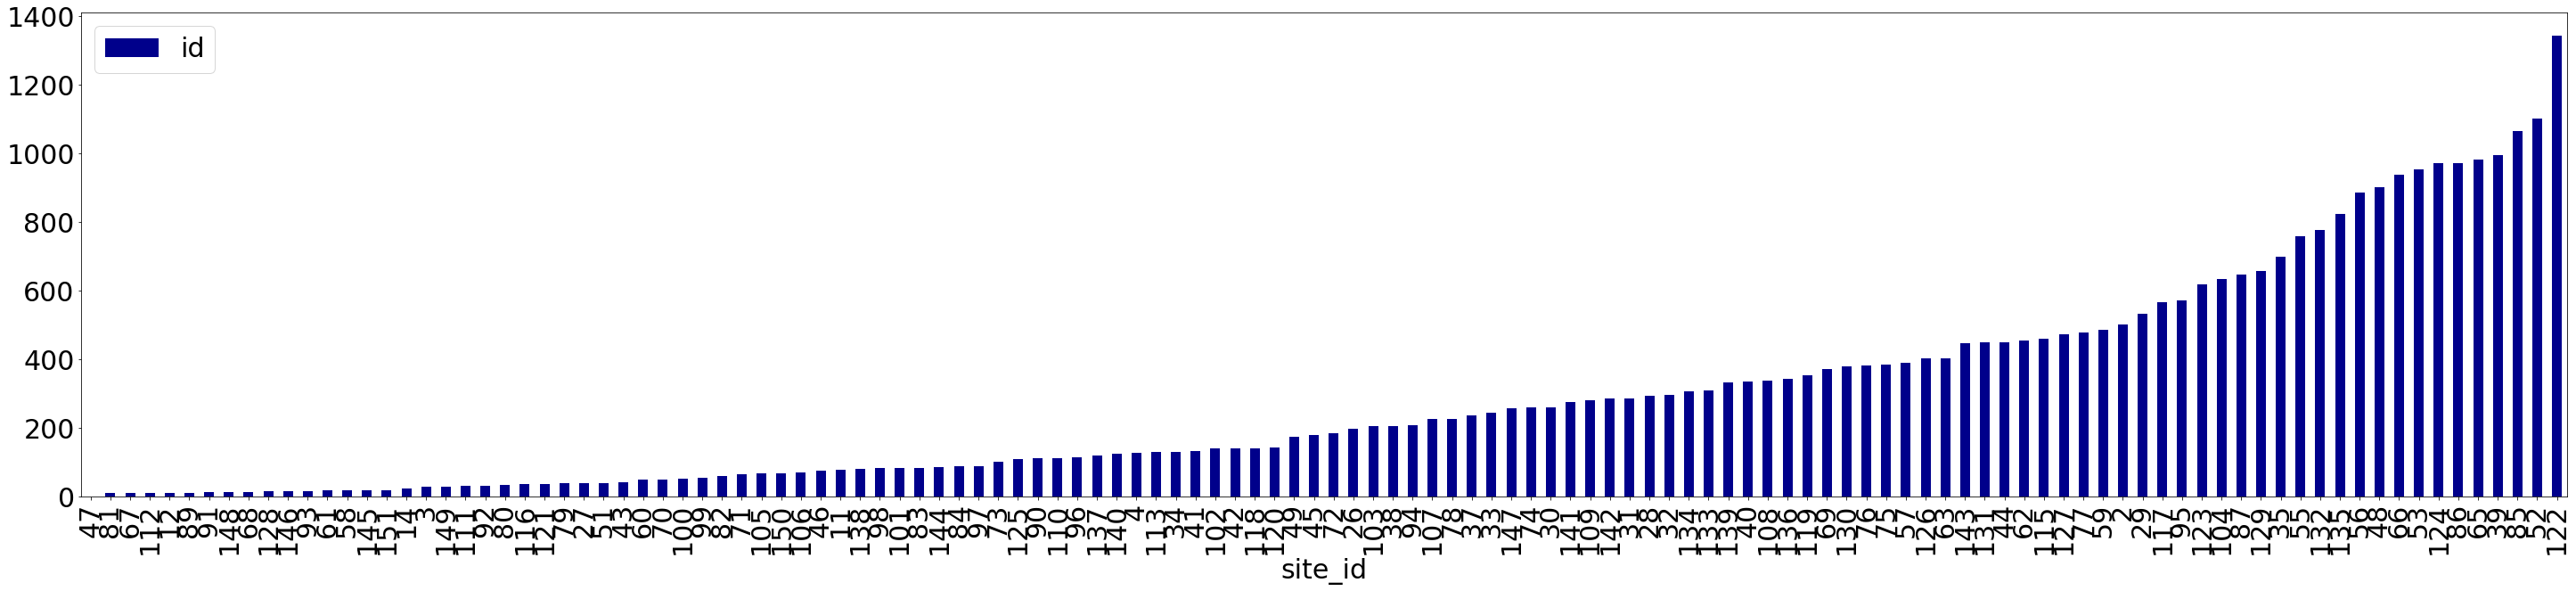

In [28]:
print('number of articles per site (id)')
article.groupby(['site_id']).count()['id'].reset_index().sort_values(by=['id']).plot.bar(x='site_id', y='id', color='darkblue')

## Article category

pokiaľ bol článok sťahovaný cez RSS a v RSS webu boli kategórie, tu sú uložené

- id


- site_id = site


- name
- excluded

In [30]:
print('number of categories: '+ str(len(article_category)))
article_category.head(10)

number of categories: 26365


,id,name,site_id,excluded
0,1,Ekonomika,NaN,0
1,2,Úvodná strana (Titulka),NaN,0
2,3,Z domova,NaN,0
3,4,Zo zahraničia,NaN,0
4,5,Šport,NaN,0
5,6,Úvodná strana (Titulka),NaN,0
6,7,Úvodná strana (Titulka),NaN,0
7,8,Z domova,NaN,0
8,9,Šport,NaN,0
9,10,Úvodná strana (Titulka),NaN,0


In [40]:
print('number of unique categories: '+ str(len(article_category.groupby(['site_id','name']).count()['id'])))
# len(article_category.groupby(['site_id','name']).count()['id'].reset_index().sort_values(by=['id']))

number of unique categories: 12372


In [31]:
article_category.describe()

,id,site_id,excluded
count,26365.00000,12372.000000,26365.000000
mean,13183.00000,93.480763,0.002693
std,7611.06426,33.741669,0.051825
min,1.00000,2.000000,0.000000
25%,6592.00000,59.000000,0.000000
50%,13183.00000,101.000000,0.000000
75%,19774.00000,123.000000,0.000000
max,26365.00000,151.000000,1.000000


In [32]:
print('what s missing')
article_category.isnull().sum()

what s missing


id              0
name            0
site_id     13993
excluded        0
dtype: int64

sites with categories: 80

sites with the least categories:
    site_id  id
44     95.0   1
5      14.0   1
72    142.0   1
2       4.0   2
75    146.0   3
Which site has how many categories


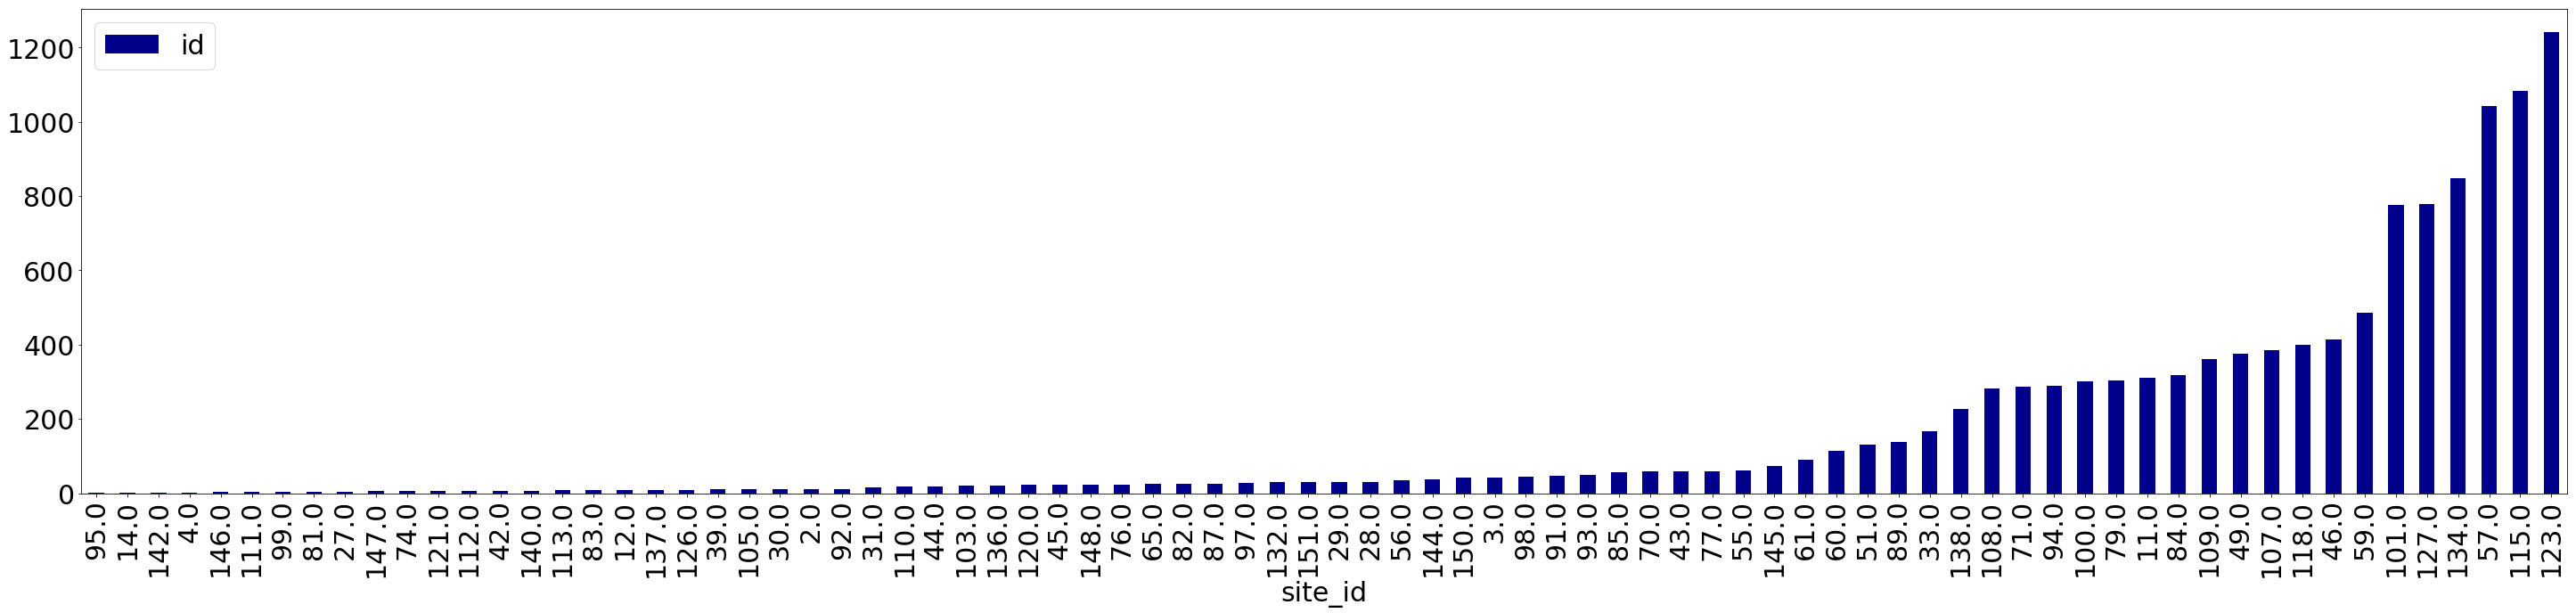

In [65]:
# number of categories per site
print('sites with categories: '+str(len(article_category.groupby(['site_id']).count()['id'].reset_index().sort_values(by=['id']))))
print('\nsites with the least categories:\n'+str(article_category.groupby(['site_id']).count()['id'].reset_index().sort_values(by=['id']).head(5)))
print('Which site has how many categories')
article_category.groupby(['site_id']).count()['id'].reset_index().sort_values(by=['id']).plot.bar(x='site_id', y='id', color='darkblue')

## Article category article

prepojovacia tabuľka article a article_category (many-to-many relation)


- article_category_id = article_category_id
- article_id = article_id

In [41]:
print('how many mappings: '+str(len(article_category_article)))
article_category_article.head(5)

how many mappings: 40931


,article_category_id,article_id
0,1,25805
1,1,25813
2,1,25831
3,1,28272
4,1,28275


article with categories: 18572

articles with the least categories:
       article_id  article_category_id
9285        43487                    1
11392       47640                    1
11393       47641                    1
11394       47642                    1
11395       47643                    1

how many categories per article


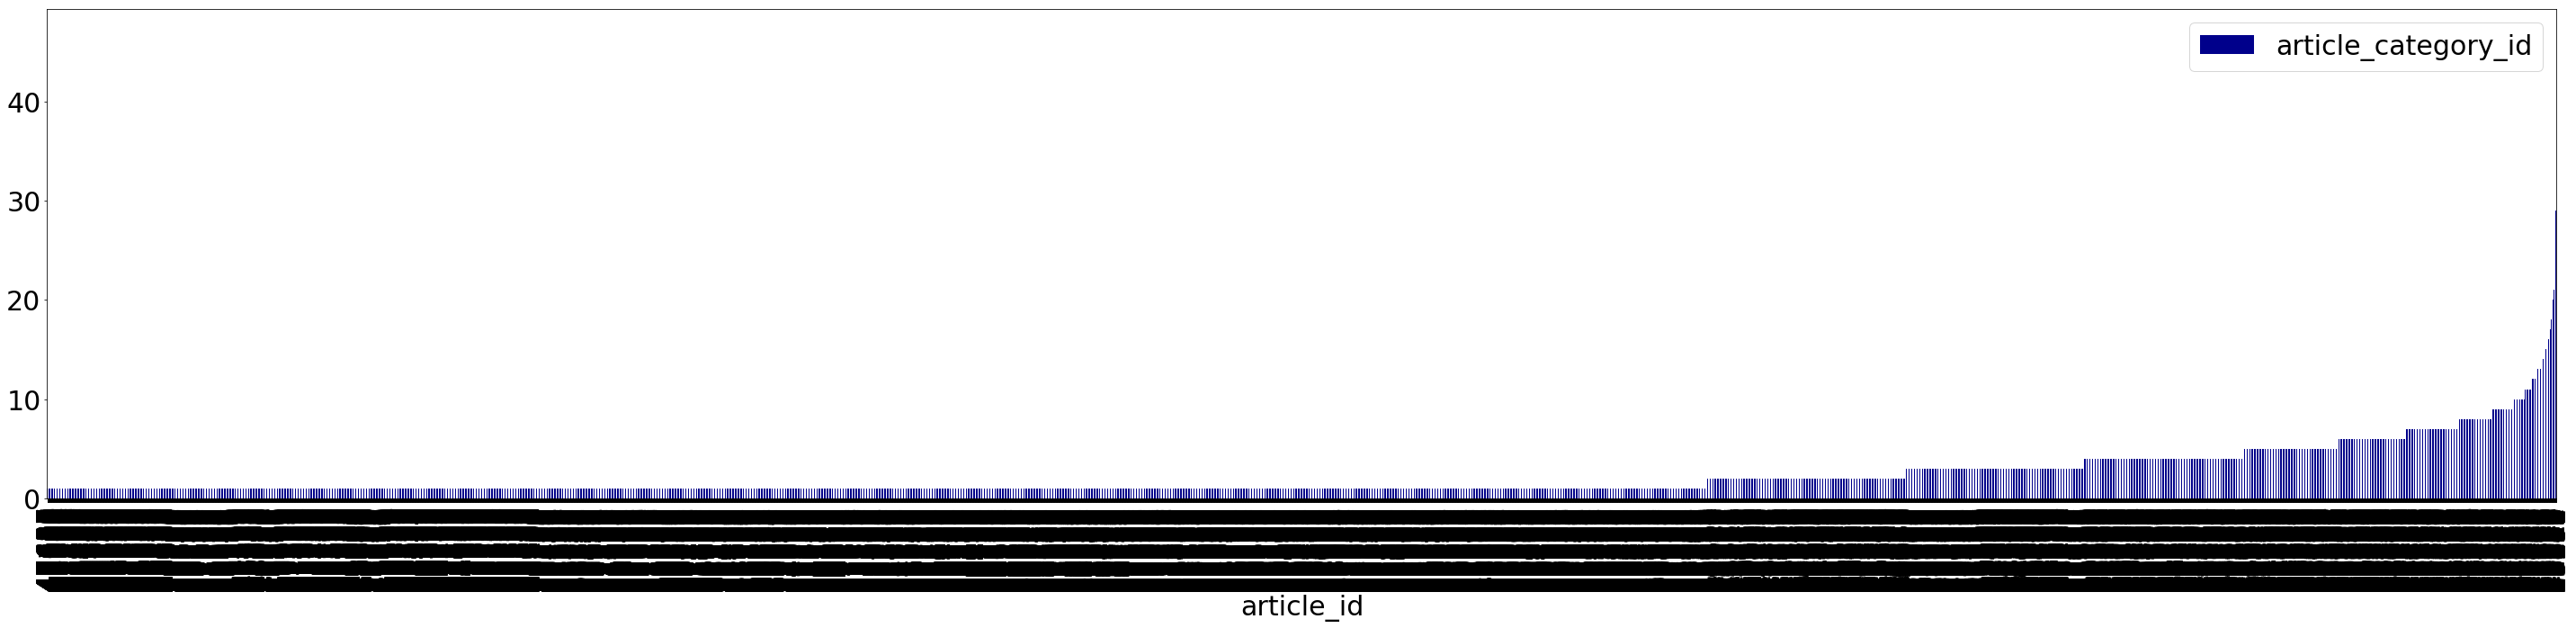

In [44]:
# how many categories per article

print('article with categories: '+str(len(article_category_article.groupby(['article_id']).count()['article_category_id'].reset_index().sort_values(by=['article_category_id']))))
print('\narticles with the least categories:\n'+str(article_category_article.groupby(['article_id']).count()['article_category_id'].reset_index().sort_values(by=['article_category_id']).head(5)))
print('\nhow many categories per article')
article_category_article.groupby(['article_id']).count()['article_category_id'].reset_index().sort_values(by=['article_category_id']).plot.bar(x='article_id', y='article_category_id', color='darkblue')

In [43]:
# top 10 categories
print('top 10 categories')
top_article_category_article = article_category_article.groupby(['article_category_id']).count()['article_id'].reset_index().sort_values(by=['article_id']).tail(10)
# top_article_category_article
print('top_article_category_article')
top_article_category_article = top_article_category_article.merge(article_category, left_on='article_category_id', right_on='id')
top_article_category_article
# article_id = # of articles for the category (Hírek = správy, Вести = spravy, Свят = svet, Македонија = Macedonsko, Știri = spravy, България = Bulhrasko)

top 10 categories
top_article_category_article


,article_category_id,article_id,id,name,site_id,excluded
0,2,358,2,Úvodná strana (Titulka),NaN,0
1,1067,384,1067,Hírek,NaN,0
2,4019,402,4019,Вести,NaN,0
3,5,451,5,Šport,NaN,0
4,22,467,22,Politika,NaN,0
5,922,518,922,Свят,NaN,0
6,1257,523,1257,Македонија,NaN,0
7,1120,657,1120,Știri,NaN,0
8,915,756,915,България,NaN,0
9,983,765,983,Svět,NaN,0


histogram of how many articles has a number of categories


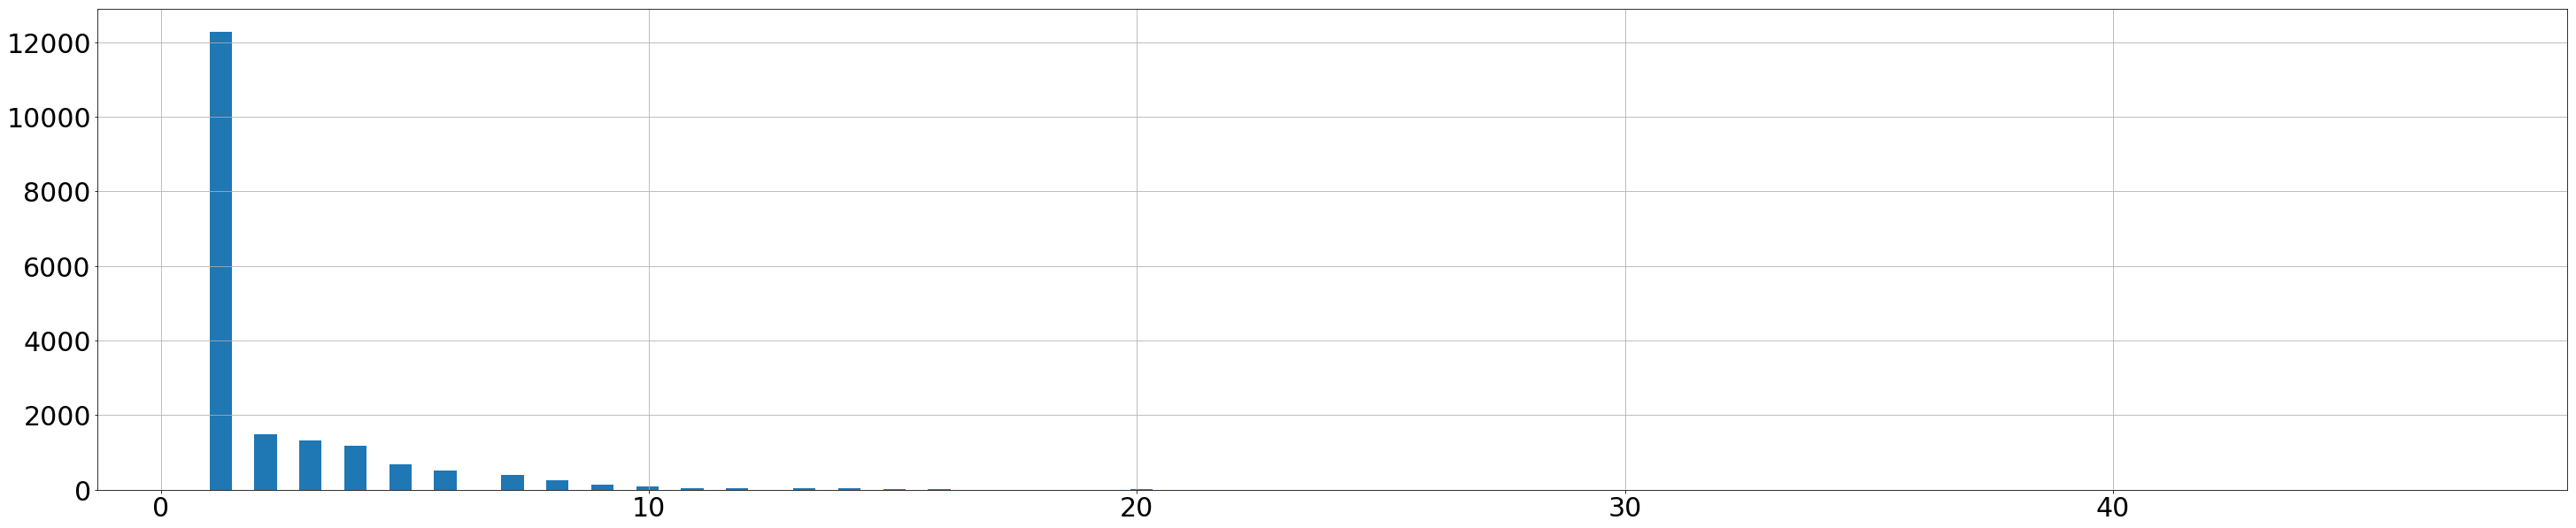

In [45]:
# histogram of how many articles has a number of categories
print('histogram of how many articles has a number of categories')
article_category_article.groupby(['article_id']).count()['article_category_id'].hist(bins=100)

## Article label

labely v článkoch vytvorené používateľmi


- id


- article_id = article


- user_id
- date_created
- path


- content
- parent_content
- offset
- lenght
- html_label



In [58]:
print('number of '+str(len(article_label)))
print('number of unique '+str(len(article_label.drop_duplicates())))
article_label.head(5)

number of 3572
number of unique 3572


,id,article_id,user_id,date_created,path,content,parent_content,offset,length,html_label
0,495,49282,8,2019-05-29 09:32:23,2:2:1:0,Рускиот на Интернет е најпопуларен јазик по ан...,Рускиот на Интернет е најпопуларен јазик по ан...,0,55,"[""<span class=\""savedTag highlighted labelCat..."
1,496,49282,8,2019-05-29 09:32:23,2:4:7:1,запрено и ширењето на латинското писмо и на ка...,Раната верзија на кирилицата ја создале учениц...,137,66,"[""<span class=\""savedTag highlighted labelCat..."
2,497,49282,8,2019-05-29 09:32:23,2:4:15:1,Холандија,Првите метални шаблони за новиот нацрт на руск...,70,9,"[""<span class=\""savedTag highlighted labelCat..."
3,498,49282,8,2019-05-29 09:32:23,2:4:21:1,Македонците,Новиот нацрт на кириличните букви ги презеле и...,89,11,"[""<span class=\""savedTag highlighted labelCat..."
4,499,49282,8,2019-05-29 09:32:23,2:4:33:1,Ширење на рускиот јазик во другите држави од с...,4. Ширење на рускиот јазик во другите држави о...,3,66,"[""<span class=\""savedTag highlighted labelCat..."


In [47]:
article_label.describe()

,id,article_id,user_id,offset,length
count,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000
mean,15161.034714,49421.996920,11.903975,60.971445,80.104703
std,7346.525212,8562.756069,6.970475,116.129032,103.410464
min,495.000000,25630.000000,1.000000,0.000000,1.000000
25%,8980.750000,44521.000000,7.000000,0.000000,8.000000
50%,15907.000000,52733.500000,8.000000,14.000000,40.000000
75%,21568.250000,55950.750000,20.000000,77.000000,118.000000
max,25483.000000,61198.000000,25.000000,2026.000000,1456.000000


In [48]:
print('what s missing')
article_label.isnull().sum()

what s missing


id                0
article_id        0
user_id           0
date_created      0
path              0
content           0
parent_content    0
offset            0
length            0
html_label        0
dtype: int64

users: 14

users:     user_id   id
0         1    2
12       22   26
9        19   92
8        18  105
2         5  189
7        15  197
3         6  211
6         9  236
11       21  257
10       20  285
1         4  309
13       25  342
4         7  432
5         8  889


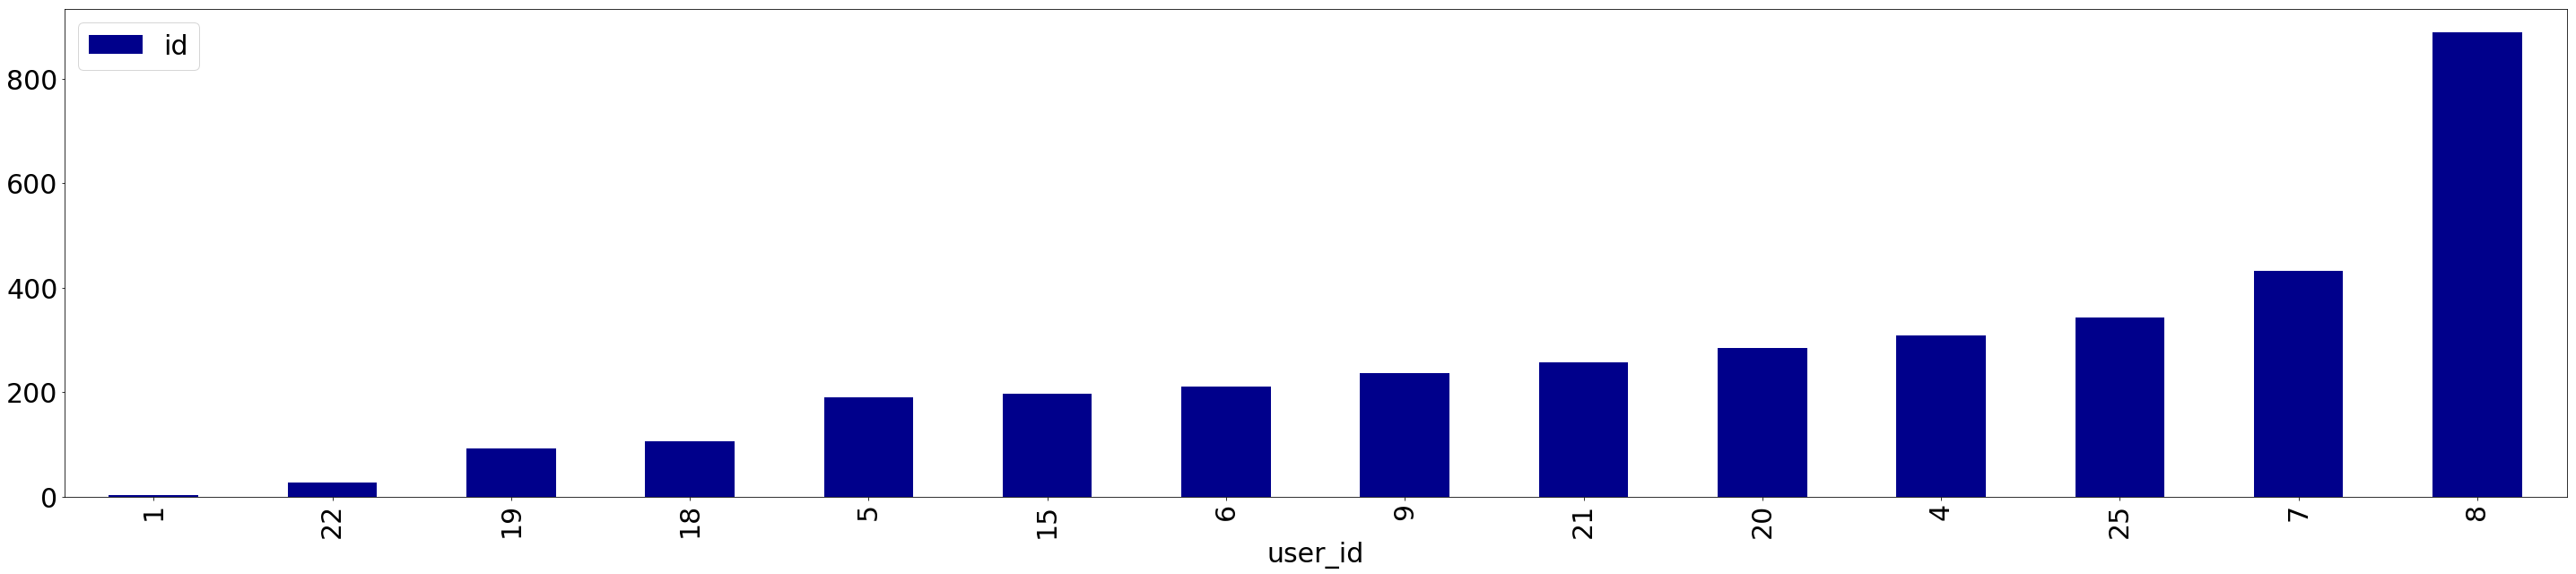

In [39]:
# how many articles per user
print('users: '+str(len(article_label.groupby(['user_id']).count()['id'].reset_index().sort_values(by=['id']))))
print('\nusers: '+str(article_label.groupby(['user_id']).count()['id'].reset_index().sort_values(by=['id'])))
article_label.groupby(['user_id']).count()['id'].reset_index().sort_values(by=['id']).plot.bar(x='user_id', y='id', color='darkblue')

articles: 657

how many labels per article

articles:
     article_id  id
0         25630   1
380       54054   1
378       54039   1
113       36869   1
373       53896   1
372       53889   1
117       36999   1
381       54064   1
366       53714   1
121       37579   1
363       53513   1
124       38091   1
359       53491   1
358       53488   1
127       38602   1
364       53688   1
352       53460   1
383       54118   1
100       36500   1
456       55509   1
80        35319   1
437       55295   1
434       55289   1
430       54870   1
424       54798   1
385       54154   1
90        35581   1
195       44707   1
390       54338   1
96        36363   1
..          ...  ..
211       46221  18
409       54474  18
477       55908  18
129       38611  18
256       49309  18
76        34722  19
188       44232  19
538       56554  19
553       56871  19
114       36965  21
162       42331  21
336       52847  22
406       54449  22
159       41681  23
132       38780  24
416   

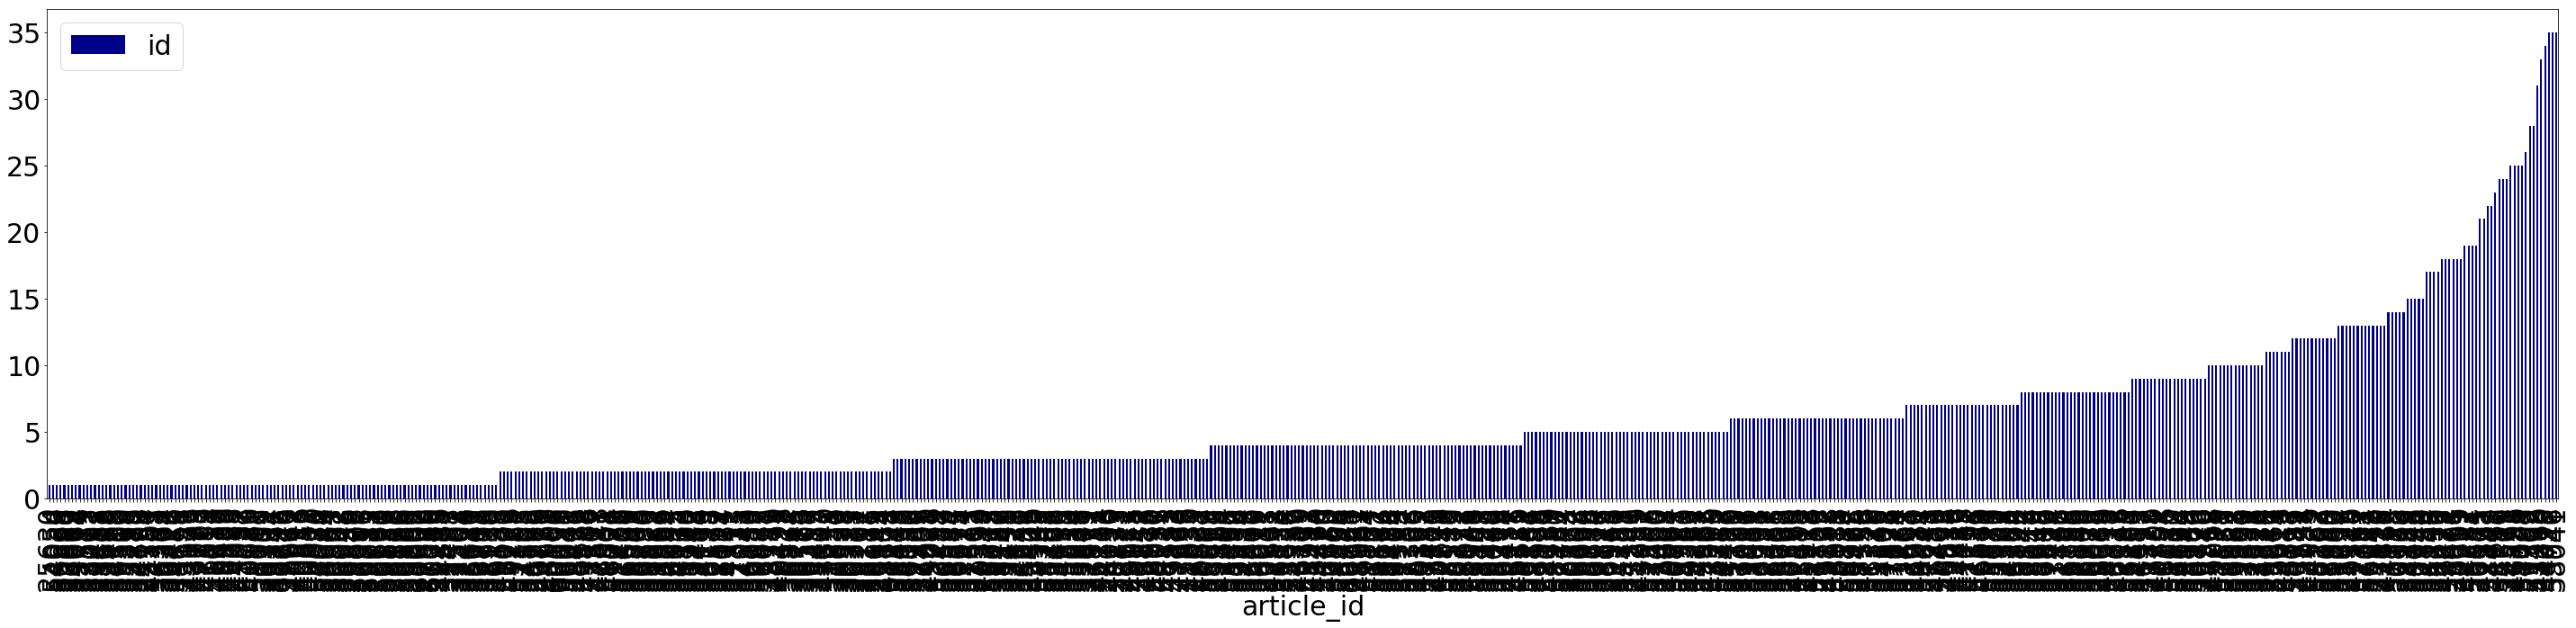

In [49]:
# how many labels per article
print('articles: '+str(len(article_label.groupby(['article_id']).count()['id'].reset_index().sort_values(by=['id']))))
print('\nhow many labels per article')
print('\narticles:\n'+str(article_label.groupby(['article_id']).count()['id'].reset_index().sort_values(by=['id'])))
article_label.groupby(['article_id']).count()['id'].reset_index().sort_values(by=['id']).plot.bar(x='article_id', y='id', color='darkblue')

### example - slovak

In [40]:
article[article['language'] == 'sk'].head(5)

,id,site_id,title,body,date_created,date_added,url,author,public_id,state,original_body,text_body,language,date_created_year
418,25687,62,Severná Kórea odpálila raketu s krátkym doletom,"<h1 class=""prependedTitle"">Severná Kórea odpál...",2019-05-04 08:10:00,2019-05-23 22:11:23,https://www.aktuality.sk/clanok/689413/severna...,None,0054c568852eae99a584ac439d8256d3,grabbed,<!--<![endif]--><head>\n<!-- Google Tag Manage...,Severná Kórea odpálila raketu s krátkym doleto...,sk,2019.0
419,25688,62,Víťazný oblúk v Paríži naplno obnovia na oslav...,"<h1 class=""prependedTitle"">Víťazný oblúk v Par...",2019-05-03 21:23:00,2019-05-23 22:11:23,https://www.aktuality.sk/clanok/689378/vitazny...,None,030fce0ade17abc196a6f47f0773c8a7,grabbed,<!--<![endif]--><head>\n<!-- Google Tag Manage...,Víťazný oblúk v Paríži naplno obnovia na oslav...,sk,2019.0
420,25689,62,Zelenskému chcú zabrániť v rozpustení parlamentu,"<h1 class=""prependedTitle"">Zelenskému chcú zab...",2019-05-04 19:55:00,2019-05-23 22:11:23,https://www.aktuality.sk/clanok/689524/zelensk...,None,0678dbec94d846bad5d5f33c99be710d,grabbed,<!--<![endif]--><head>\n<!-- Google Tag Manage...,Zelenskému chcú zabrániť v rozpustení parlamen...,sk,2019.0
421,25690,62,Babiš chce vysielať vojakov do zahraničia aj b...,"<h1 class=""prependedTitle"">Babiš chce vysielať...",2019-05-04 13:05:00,2019-05-23 22:11:23,https://www.aktuality.sk/clanok/689459/babis-c...,None,06e78eb61648e4ff0f734e50bef2572f,grabbed,<!--<![endif]--><head>\n<!-- Google Tag Manage...,Babiš chce vysielať vojakov do zahraničia aj b...,sk,2019.0
422,25691,62,Smrť Dana Nekonečného zapríčinil neliečený zvý...,"<h1 class=""prependedTitle"">Smrť Dana Nekonečné...",2019-05-05 07:53:00,2019-05-23 22:11:23,https://www.aktuality.sk/clanok/689543/smrt-da...,None,070c9313001e02625de3fe46d0265909,grabbed,<!--<![endif]--><head>\n<!-- Google Tag Manage...,Smrť Dana Nekonečného zapríčinil neliečený zvý...,sk,2019.0


In [41]:
article_label[article_label['article_id'] == 25559]

,id,article_id,user_id,date_created,path,content,parent_content,offset,length,html_label


## Label

definícia labelu podľa administrátorov globsecu

 tri tematicke labely (3 Russia as a protector of traditional values, 1 USA as manipulator and devious actor, 2 EU dictate), labely definujuce krajiny, a dalsi label ak sa nachadza tematicky label priamo v nadpise (Headline)
 
- id


- category_id = category


- created_by
- name
- description
- created_date

In [51]:
print('number of labels: '+str(len(label)))
label

number of labels: 161


,id,created_by,category_id,name,description,created_date
0,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07
1,37,None,5,3 Russia as a protector of traditional values,"Russia, conservative society, birth rates, dem...",2019-05-09 10:56:29
2,52,None,8,1 USA as manipulator and devious actor,"US funding, subversive influence through NGOs,...",2019-05-15 13:01:15
3,54,None,9,2 EU dictate,"Brussel’s dictate, lack of democratic accounta...",2019-05-15 13:03:32
4,64,None,6,Unsure,"If you're unsure about a narrative, article or...",2019-05-17 13:58:32
5,70,None,11,Afghanistan,None,2019-05-27 14:46:04
6,71,None,11,Albania,None,2019-05-27 14:46:14
7,72,None,11,Algeria,None,2019-05-27 14:46:24
8,74,None,11,Angola,None,2019-05-27 14:46:43
9,76,None,11,Argentina,None,2019-05-27 14:47:05


In [52]:
print('what is missing')
label.isnull().sum()

what is missing


id                0
created_by      161
category_id       0
name              0
description     156
created_date      0
dtype: int64

## Label article label

prepojovacia tabuľka tabuľky label a tabuľky article_label (many-to-many relation)


- label_id = label
- article_label_id = article_label_id

In [59]:
print('number of mappings: '+str(len(label_article_label)))
print('number of unique mappings: '+str(len(label_article_label.drop_duplicates())))
print('number of article_label: '+str(len(article_label)))
print('article_label without a mapping: '+str(len(article_label) - len(label_article_label)))

label_article_label.head(5)

number of mappings: 2303
number of unique mappings: 2303
number of article_label: 3572
article_label without a mapping: 1269


,label_id,article_label_id
0,31,1030
1,31,1182
2,31,2071
3,31,2085
4,31,2094


In [45]:
label_article_label.isnull().sum()

label_id            0
article_label_id    0
dtype: int64

## Label category

všetky labely sú v systéme rozdelené do kategórii podľa toho aké tematické okruhy si globsec administrátori určili

- id


- name
- description
- created_date
- members_can_add_labels
- color

v zasade = len farby

In [60]:
print('number of: '+str(len(label_category)))
label_category.head(10)

number of: 5


,id,name,description,created_date,members_can_add_labels,color
0,5,Russia,None,2019-05-05 18:58:17,0,red
1,6,Specific tags,None,2019-05-05 18:58:51,0,blue
2,8,USA,None,2019-05-15 12:59:11,0,orange
3,9,EU,None,2019-05-15 13:03:08,0,pink
4,11,List of countries,None,2019-05-27 14:45:30,0,grey


In [61]:
label_category.isnull().sum()

id                        0
name                      0
description               5
created_date              0
members_can_add_labels    0
color                     0
dtype: int64

## Site

stránky odkiaľ sú články stiahnuté


- id


- name
- enabled - ???
- host
- language
- proto
- slug
- type
- last_scraped
- last_processed

In [62]:
print('number of '+str(len(site)))
site.head(5)

number of 144


,id,name,enabled,host,language,proto,slug,type,last_scraped,last_processed
0,2,Hlavné správy,1,hlavnespravy.sk,sk,https://,hlavne-spravy,conspi,2019-07-07 18:09:57,None
1,3,Pán občan,1,panobcan.sk,sk,https://,pan-obcan,conspi,2019-07-07 18:09:58,None
2,4,Slobodný Vysielač,1,slobodnyvysielac.sk,sk,https://,slobodny-vysielac,conspi,2019-07-07 18:10:11,None
3,5,SME,0,www.sme.sk,sk,https://,sme,balanced,NaT,None
4,6,HN Online,0,articles.hnonline.sk,sk,https://,hn-online,balanced,NaT,None


In [63]:
print('what s missing')
site.isnull().sum()

what s missing


id                  0
name                0
enabled             0
host                0
language            0
proto               0
slug                0
type                0
last_scraped       17
last_processed    144
dtype: int64

number of sites per language
  language  id
0       bg  20
1       cz  17
2       hu  17
3       me  12
4       mk  14
5       ro  20
6       rs  19
7       sk  25


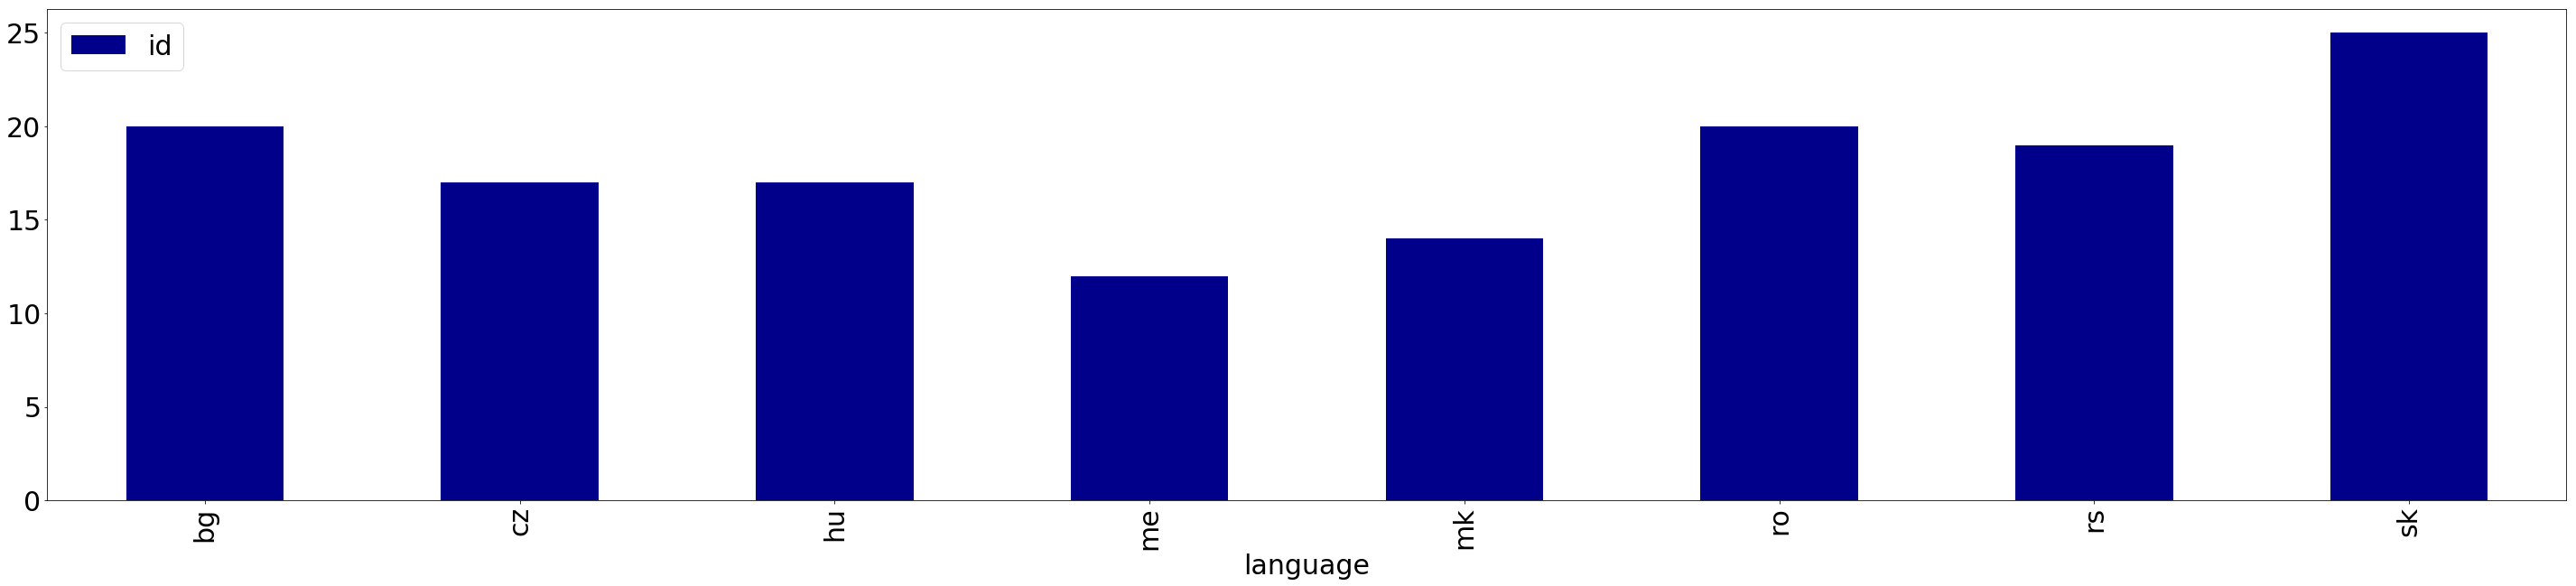

In [64]:
# number of sites per language
print('number of sites per language')

print(site.groupby(['language']).count()['id'].reset_index())

site.groupby(['language']).count()['id'].reset_index().plot.bar(x='language', y='id', color='darkblue')

number of sites per type
HyperPartisan = Extremely partisan; extremely biased in favor of a political party.
             type  id
0        balanced  23
1          conspi  68
2            grey  23
3  hyper_partisan  30


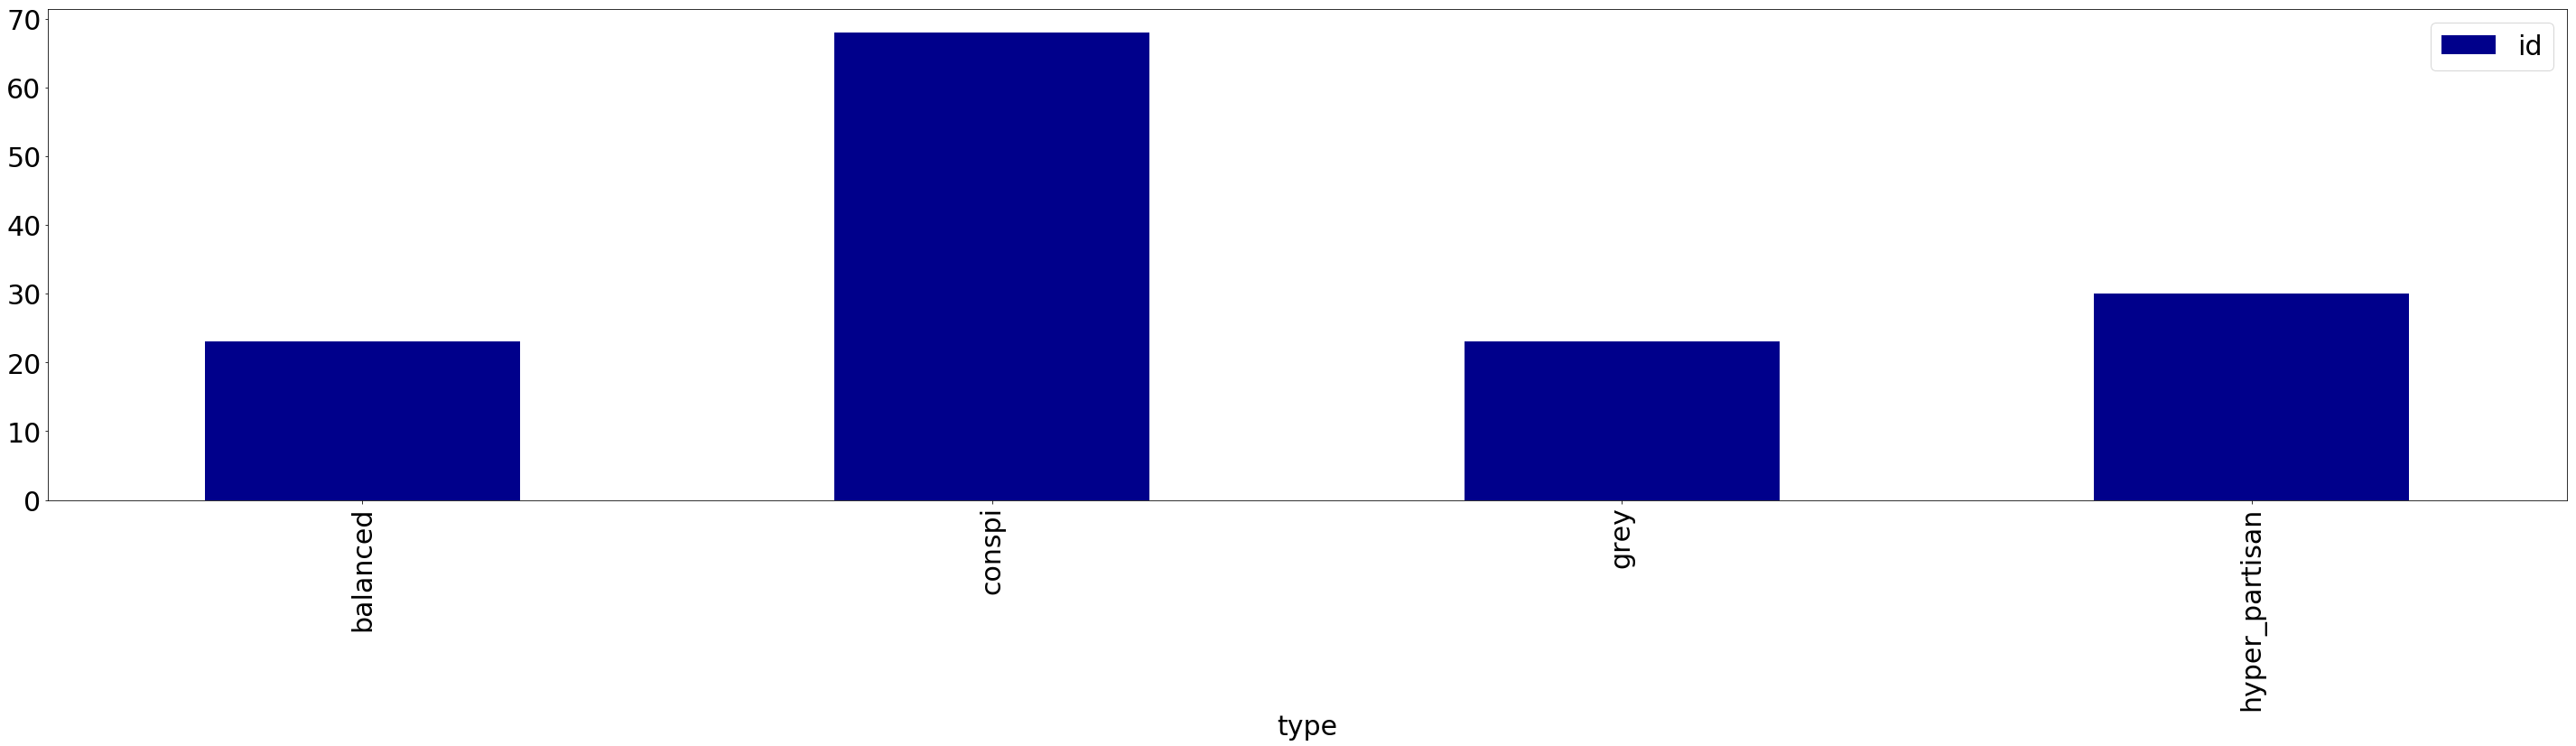

In [66]:
# number of sites per type
print('number of sites per type')
print('HyperPartisan = Extremely partisan; extremely biased in favor of a political party.')

print(site.groupby(['type']).count()['id'].reset_index())

site.groupby(['type']).count()['id'].reset_index().plot.bar(x='type', y='id', color='darkblue')

In [67]:
print('Hyper partisan')
site[site['type'] == 'hyper_partisan']

Hyper partisan


,id,name,enabled,host,language,proto,slug,type,last_scraped,last_processed
34,39,cz.sputniknews.com,1,cz.sputniknews.com,cz,https://,cz-sputniknews-com,hyper_partisan,2019-07-06 15:06:56,None
37,42,napimigrans.info,1,napimigrans.info,hu,http://,napimigrans-info,hyper_partisan,2019-07-06 15:08:24,None
50,56,origo.hu,1,www.origo.hu,hu,https://,origo-hu,hyper_partisan,2019-07-06 15:09:20,None
74,81,stredoevropan.cz,1,stredoevropan.cz,cz,https://,stredoevropan-cz,hyper_partisan,2019-07-06 16:02:22,None
76,83,pravyprostor.cz,1,pravyprostor.cz,cz,https://,pravyprostor-cz,hyper_partisan,2019-07-06 16:02:48,None
82,89,roncea.ro,1,roncea.ro,ro,http://,roncea-ro,hyper_partisan,2019-07-06 16:03:43,None
83,90,fluierul.ro,1,fluierul.ro,ro,http://,fluierul-ro,hyper_partisan,2019-07-06 16:04:49,None
85,92,nasul.tv,1,www.nasul.tv,ro,https://,nasul-tv,hyper_partisan,2019-07-06 16:05:02,None
87,94,nationalisti.ro,1,www.nationalisti.ro,ro,http://,nationalisti-ro,hyper_partisan,2019-07-06 16:05:04,None
88,95,stiripesurse.ro,1,www.stiripesurse.ro,ro,https://,stiripesurse-ro,hyper_partisan,2019-07-06 16:05:06,None


In [68]:
print('Balanced')
site[site['type'] == 'balanced']

Balanced


,id,name,enabled,host,language,proto,slug,type,last_scraped,last_processed
3,5,SME,0,www.sme.sk,sk,https://,sme,balanced,NaT,None
4,6,HN Online,0,articles.hnonline.sk,sk,https://,hn-online,balanced,NaT,None
5,7,Aktuality,0,www.aktuality.sk,sk,https://,aktuality,balanced,NaT,None
23,28,capital.bg,1,capital.bg,bg,https://,capital-bg,balanced,2019-07-07 18:13:29,None
24,29,Dnevnik.bg,1,dnevnik.bg,bg,https://,dnevnik-bg,balanced,2019-07-07 18:13:37,None
25,30,mediapool.bg,1,www.mediapool.bg,bg,https://,mediapool-bg,balanced,2019-07-07 18:13:56,None
42,47,adevarul.ro,1,adevarul.ro,ro,https://,adevarul-ro,balanced,2019-07-06 15:08:46,None
49,55,index.hu,1,index.hu,hu,https://,index-hu,balanced,2019-07-06 15:09:10,None
51,57,24.hu,1,24.hu,hu,https://,24-hu,balanced,2019-07-06 15:09:24,None
56,62,aktuality.sk,1,www.aktuality.sk,sk,https://,aktuality-sk,balanced,2019-07-06 15:09:51,None


In [70]:
print('Grey')
site[site['type'] == 'grey']

Grey


,id,name,enabled,host,language,proto,slug,type,last_scraped,last_processed
9,12,Slovenskí branci,1,www.slovenski-branci.sk,sk,http://,slovenski-branci,grey,2019-07-07 18:10:21,None
26,31,vesti.bg,1,www.vesti.bg,bg,https://,vesti-bg,grey,2019-07-07 18:14:00,None
27,32,dnes.bg,1,www.dnes.bg,bg,https://,dnes-bg,grey,2019-07-07 18:14:20,None
28,33,trud.bg,1,trud.bg,bg,https://,trud-bg,grey,2019-07-07 18:14:33,None
35,40,eurozpravy.cz,1,eurozpravy.cz,cz,https://,eurozpravy-cz,grey,2019-07-06 15:08:18,None
36,41,minden-egyben.com,1,www.minden-egyben.com,hu,https://,minden-egyben-com,grey,2019-07-06 15:08:22,None
43,48,infomax.mk,1,infomax.mk/wp,mk,https://,infomax-mk,grey,2019-07-06 15:08:47,None
45,50,kolektiv.me,0,kolektiv.me,me,https://,kolektiv-me,grey,2019-05-23 22:34:14,None
53,59,nemzeti.net,1,nemzeti.net,hu,https://,nemzeti-net,grey,2019-07-06 15:09:45,None
58,65,24chasa.bg,1,www.24chasa.bg,bg,https://,24chasa-bg,grey,2019-07-06 15:09:53,None


In [71]:
print('Conspi')
site[site['type'] == 'conspi']

Conspi


,id,name,enabled,host,language,proto,slug,type,last_scraped,last_processed
0,2,Hlavné správy,1,hlavnespravy.sk,sk,https://,hlavne-spravy,conspi,2019-07-07 18:09:57,None
1,3,Pán občan,1,panobcan.sk,sk,https://,pan-obcan,conspi,2019-07-07 18:09:58,None
2,4,Slobodný Vysielač,1,slobodnyvysielac.sk,sk,https://,slobodny-vysielac,conspi,2019-07-07 18:10:11,None
6,9,nemesis.sk,0,www.nemesis.sk,sk,http://,nemesis-sk,conspi,NaT,None
7,10,zahadnysvet.sk,0,zahadnysvet.sk,sk,https://,zahadnysvet-sk,conspi,NaT,None
8,11,zemavek,1,zemavek.sk,sk,https://,zemavek,conspi,2019-07-07 18:10:17,None
10,14,lubohudo,1,www.lubohudo.sk,sk,https://,lubohudo,conspi,2019-07-07 18:10:33,None
11,15,napalete.sk,0,www.napalete.sk,sk,https://,napalete-sk,conspi,NaT,None
12,17,protiprudu.org,0,www.protiprudu.org,sk,https://,protiprudu-org,conspi,NaT,None
13,18,nss.sk,0,nss.sk,sk,http://,nss-sk,conspi,NaT,None


# All-frame

In [72]:
article_site = article.merge(site, left_on='site_id', right_on='id', suffixes=('_article','_site'))
article_site.head(5)

,id_article,site_id,title,body,date_created,date_added,url,author,public_id,state,...,id_site,name,enabled,host,language_site,proto,slug,type,last_scraped,last_processed
0,25269,37,"След като опитал дивечово месо,\nВенци Мартино...","<h1 class=""prependedTitle"">След като опитал ди...",NaT,2019-05-23 22:10:54,https://www.168chasa.bg/Article/7447905,None,08ec92eedaba468b62b597d74ae7a069,unrelated,...,37,168chasa.bg,1,www.168chasa.bg,bg,https://,168chasa-bg,conspi,2019-07-06 15:06:53,None
1,25270,37,Фризьорката Милена била вързана и бита преди С...,"<h1 class=""prependedTitle"">Фризьорката Милена ...",NaT,2019-05-23 22:10:54,https://www.168chasa.bg/Article/7447970,None,0f9302930543cb91e1a9081e57fe1cdb,unrelated,...,37,168chasa.bg,1,www.168chasa.bg,bg,https://,168chasa-bg,conspi,2019-07-06 15:06:53,None
2,25271,37,"Румен Радев за завода ""Фолксваген"": Аз поканих...","<h1 class=""prependedTitle"">Румен Радев за заво...",NaT,2019-05-23 22:10:54,https://www.168chasa.bg/Article/7448145,None,1211373b8984e0f4fafaf97caa4221a2,grabbed,...,37,168chasa.bg,1,www.168chasa.bg,bg,https://,168chasa-bg,conspi,2019-07-06 15:06:53,None
3,25272,37,"Бърз съд за джебчийката, обезвредена\nот китай...","<h1 class=""prependedTitle"">Бърз съд за джебчий...",NaT,2019-05-23 22:10:54,https://www.168chasa.bg/Article/7430591,None,13698664069a5edbfcd7dd52bc3dd4d3,unrelated,...,37,168chasa.bg,1,www.168chasa.bg,bg,https://,168chasa-bg,conspi,2019-07-06 15:06:53,None
4,25273,37,"Азиатци ""обезвредиха"" с бойни хватки джебчийка...","<h1 class=""prependedTitle"">Азиатци ""обезвредих...",NaT,2019-05-23 22:10:54,https://www.168chasa.bg/Article/7430166,None,138fe38e994e0de945d3c1ae6d412444,unrelated,...,37,168chasa.bg,1,www.168chasa.bg,bg,https://,168chasa-bg,conspi,2019-07-06 15:06:53,None


number of articles per type

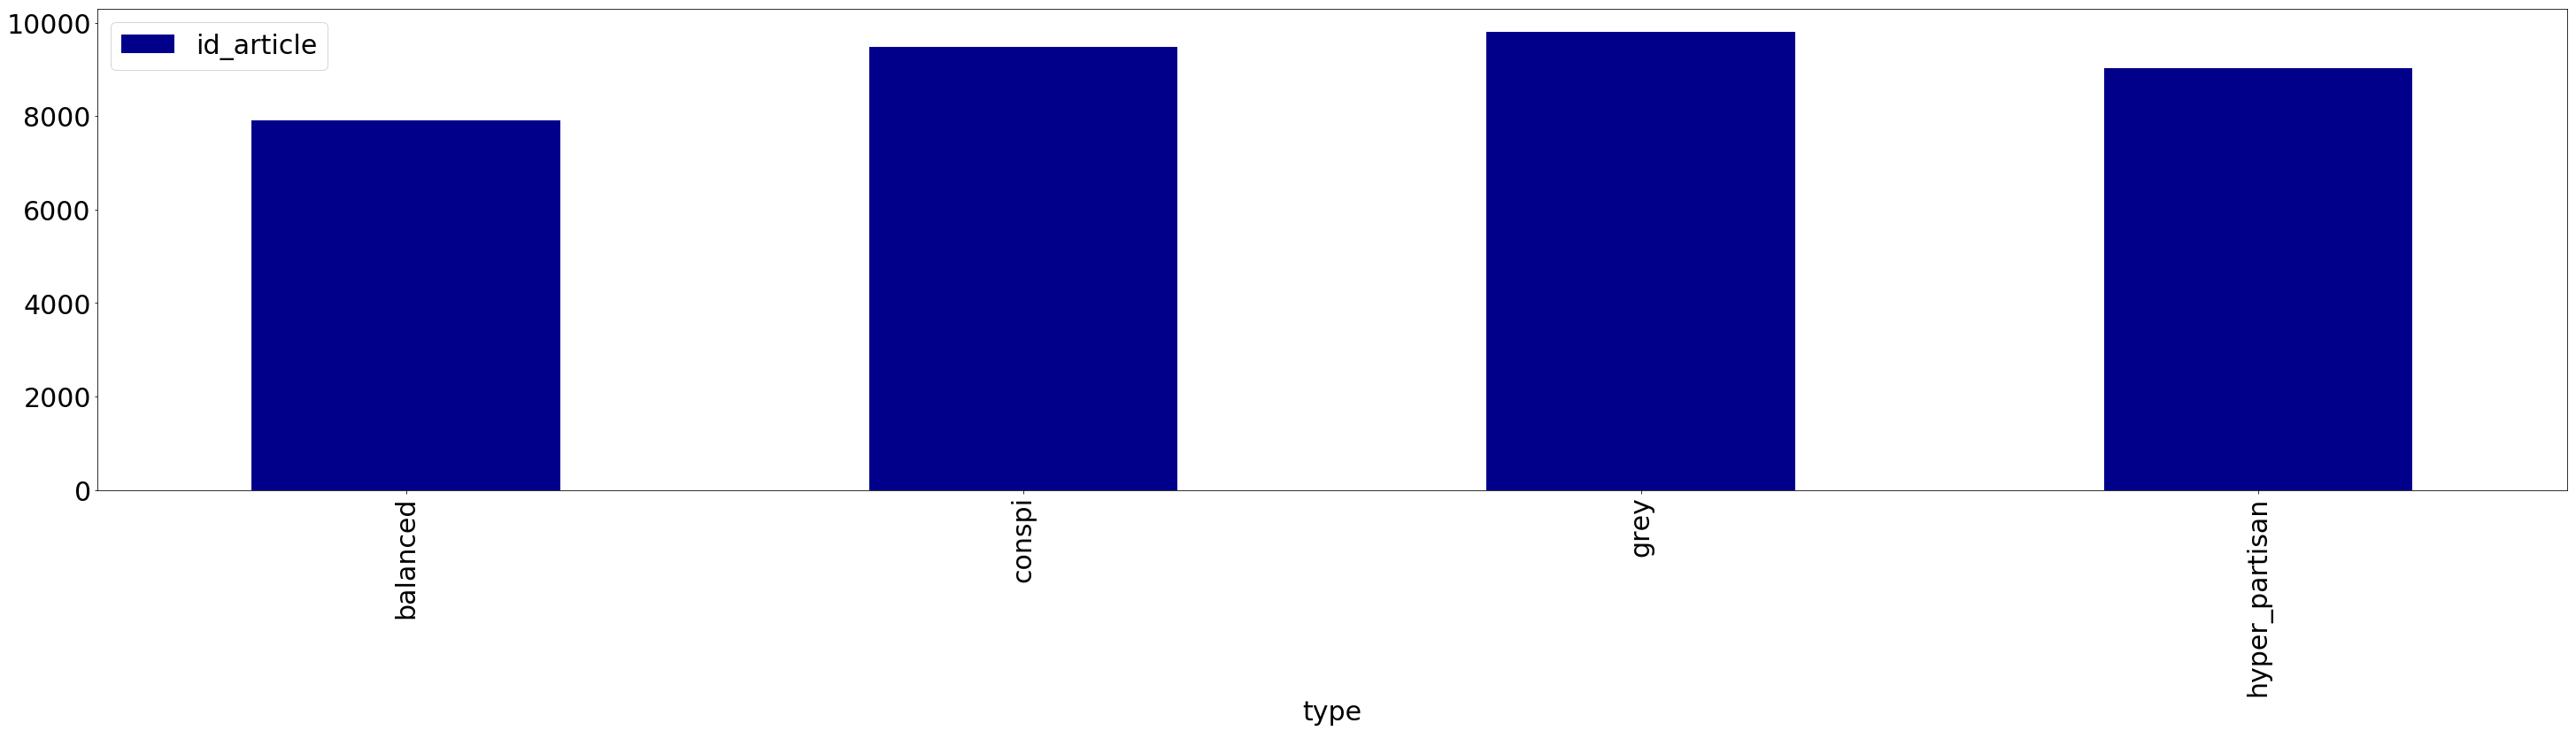

In [73]:
# number of articles per type
article_site.groupby(['type']).count()['id_article'].reset_index().plot.bar(x='type', y='id_article', color='darkblue')

In [74]:
article_site_authorNone = article_site[article_site['author'].isnull()]
article_site_author = article_site[article_site['author'].notnull()]

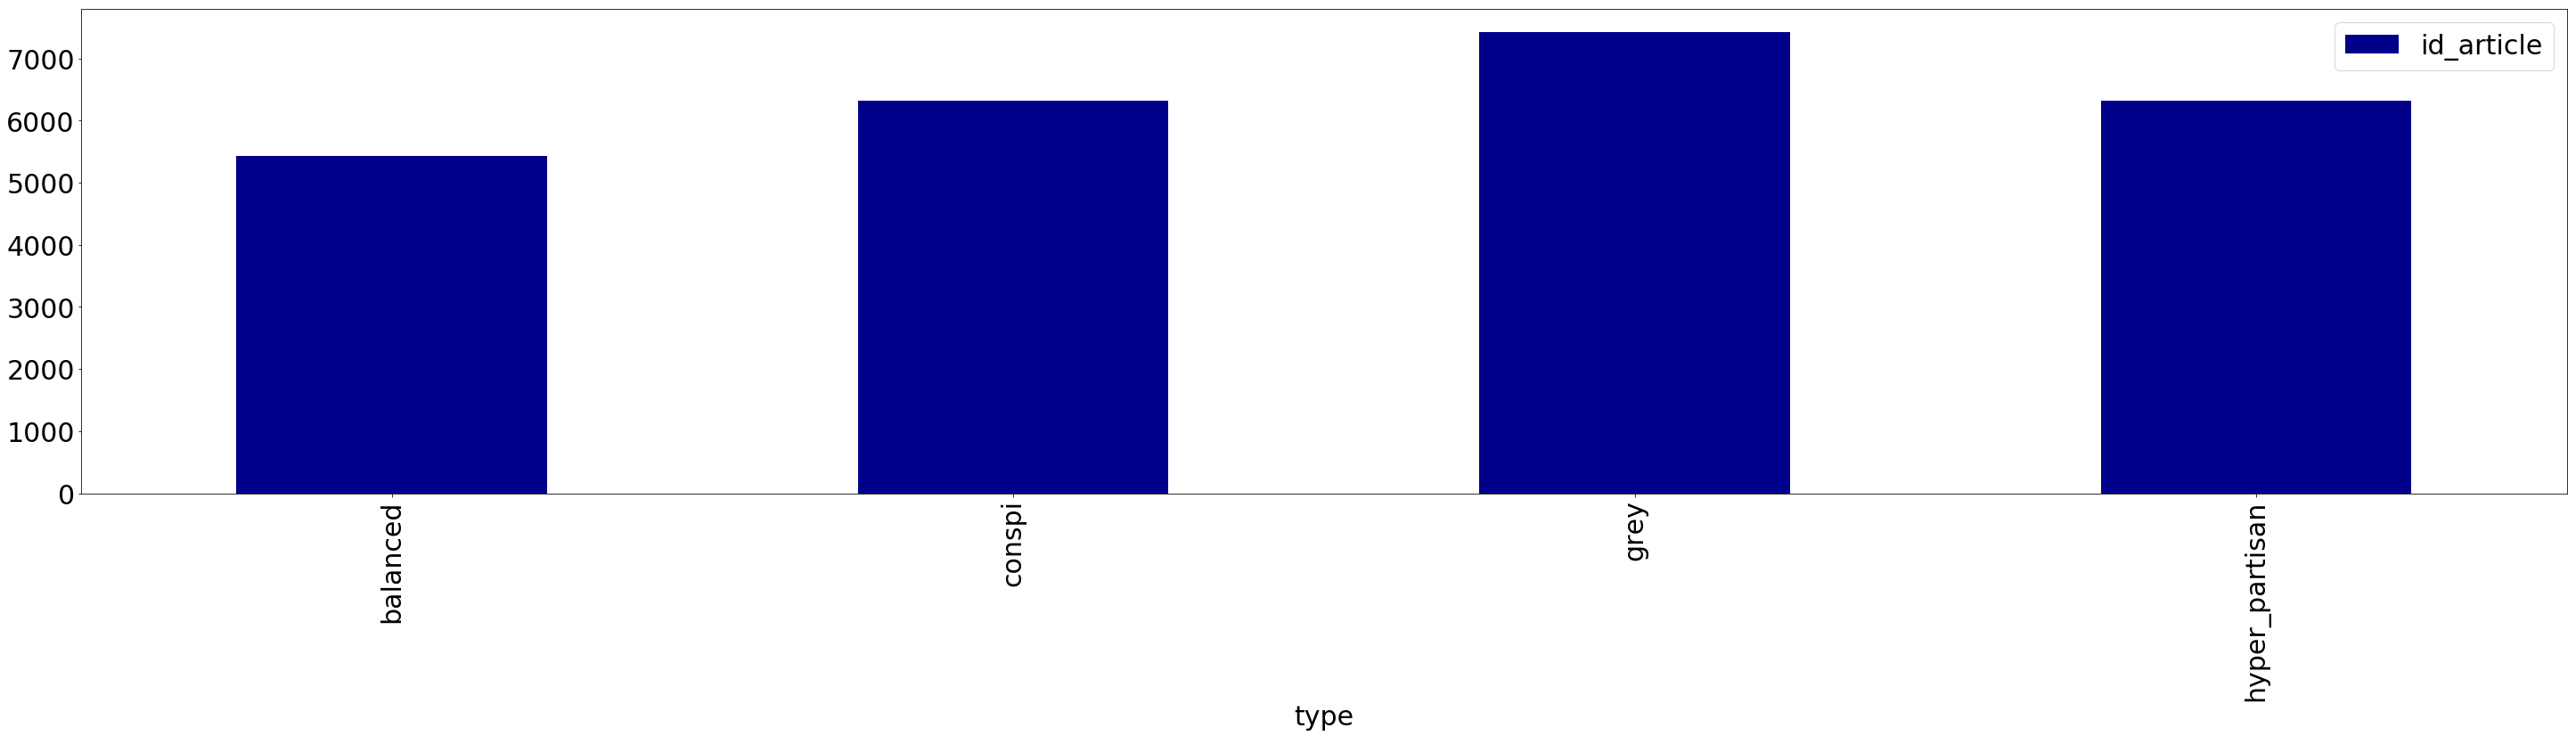

In [75]:
# number of articles per type = with autor
article_site_authorNone.groupby(['type']).count()['id_article'].reset_index().plot.bar(x='type', y='id_article', color='darkblue')

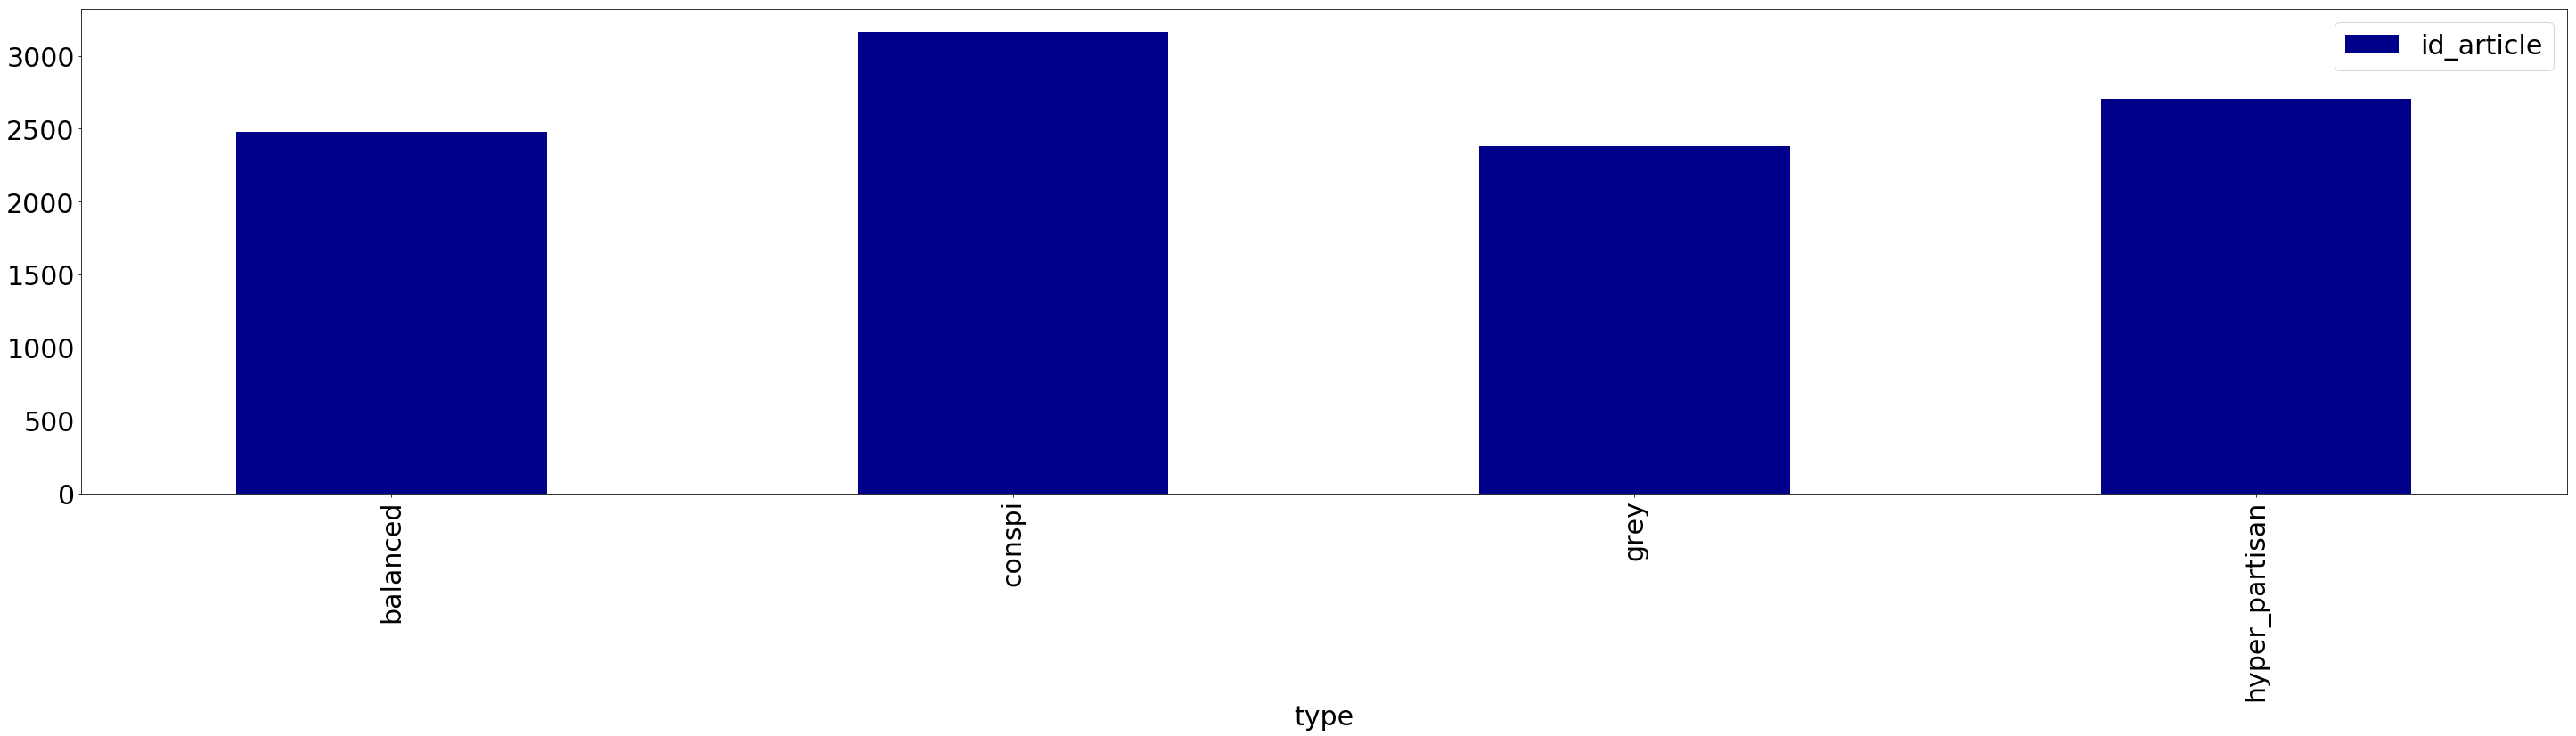

In [76]:
# number of articles per type = without autor
article_site_author.groupby(['type']).count()['id_article'].reset_index().plot.bar(x='type', y='id_article', color='darkblue')

In [77]:
article_site_date_createdNone = article_site[article_site['date_created'].isnull()]
article_site_date_created= article_site[article_site['date_created'].notnull()]

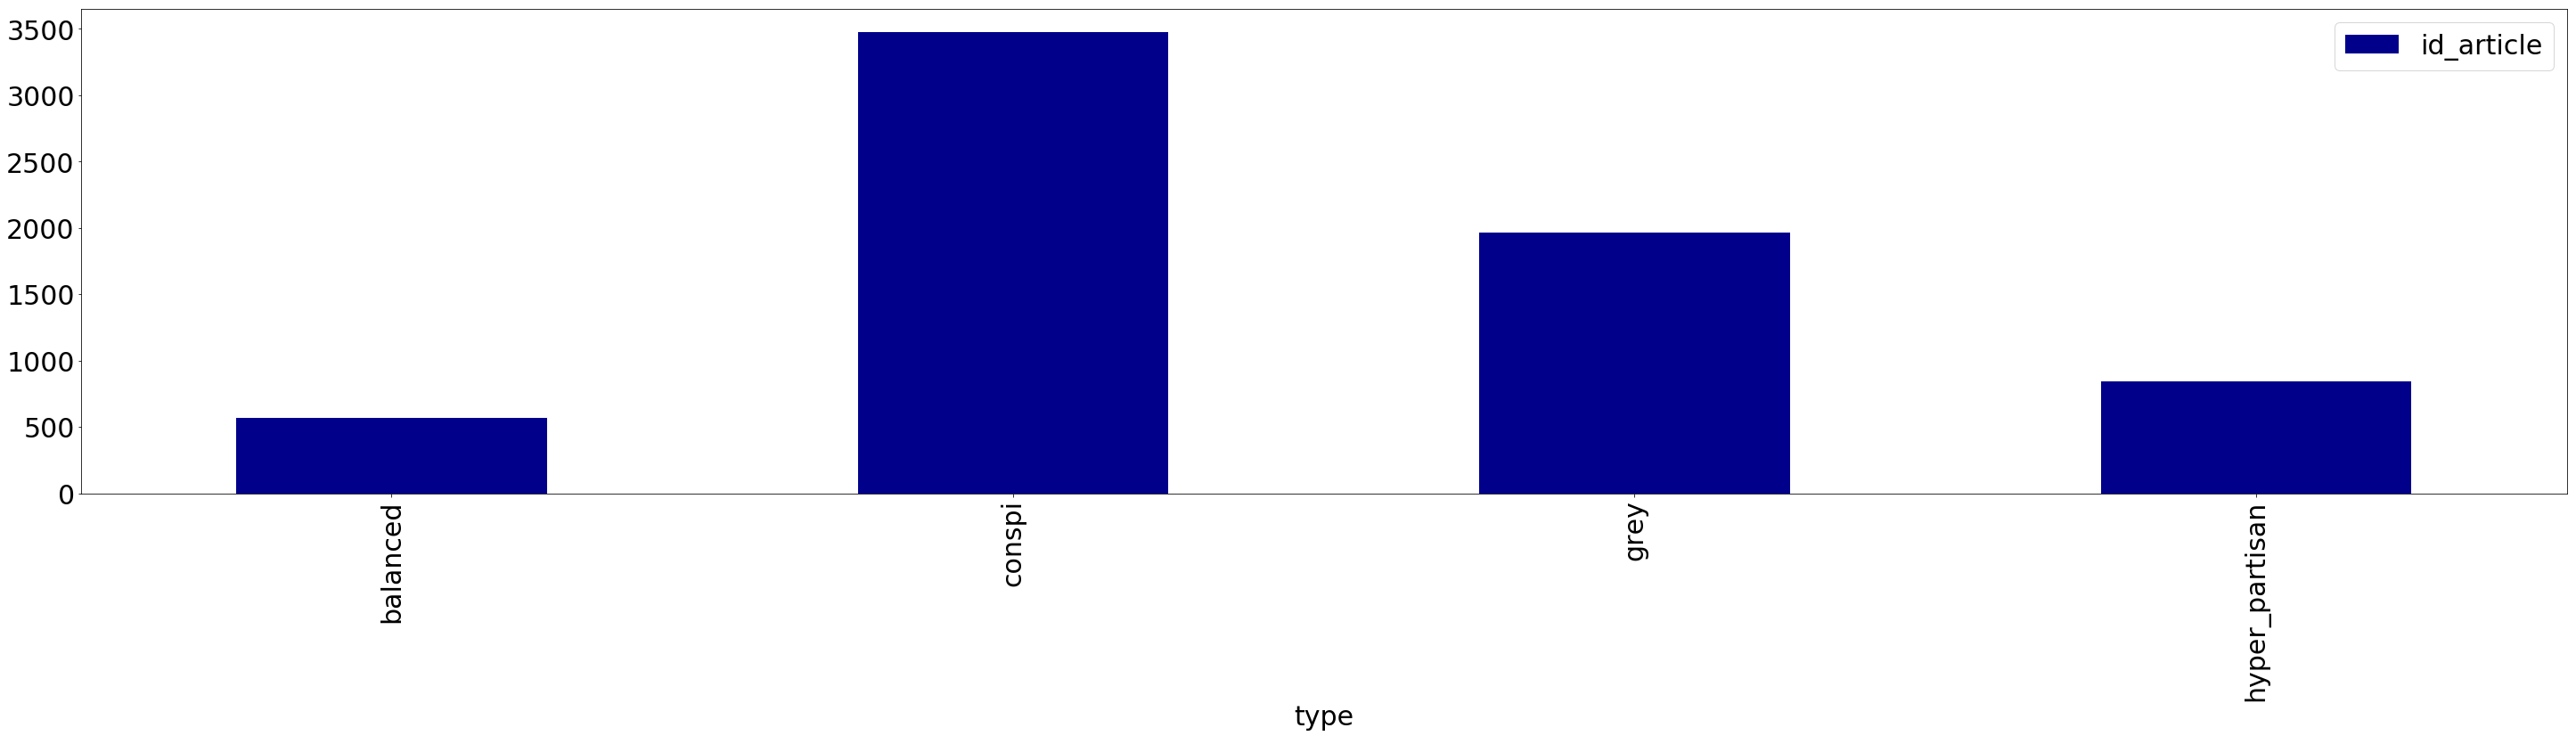

In [78]:
# number of articles per type = with autor
article_site_date_createdNone.groupby(['type']).count()['id_article'].reset_index().plot.bar(x='type', y='id_article', color='darkblue')

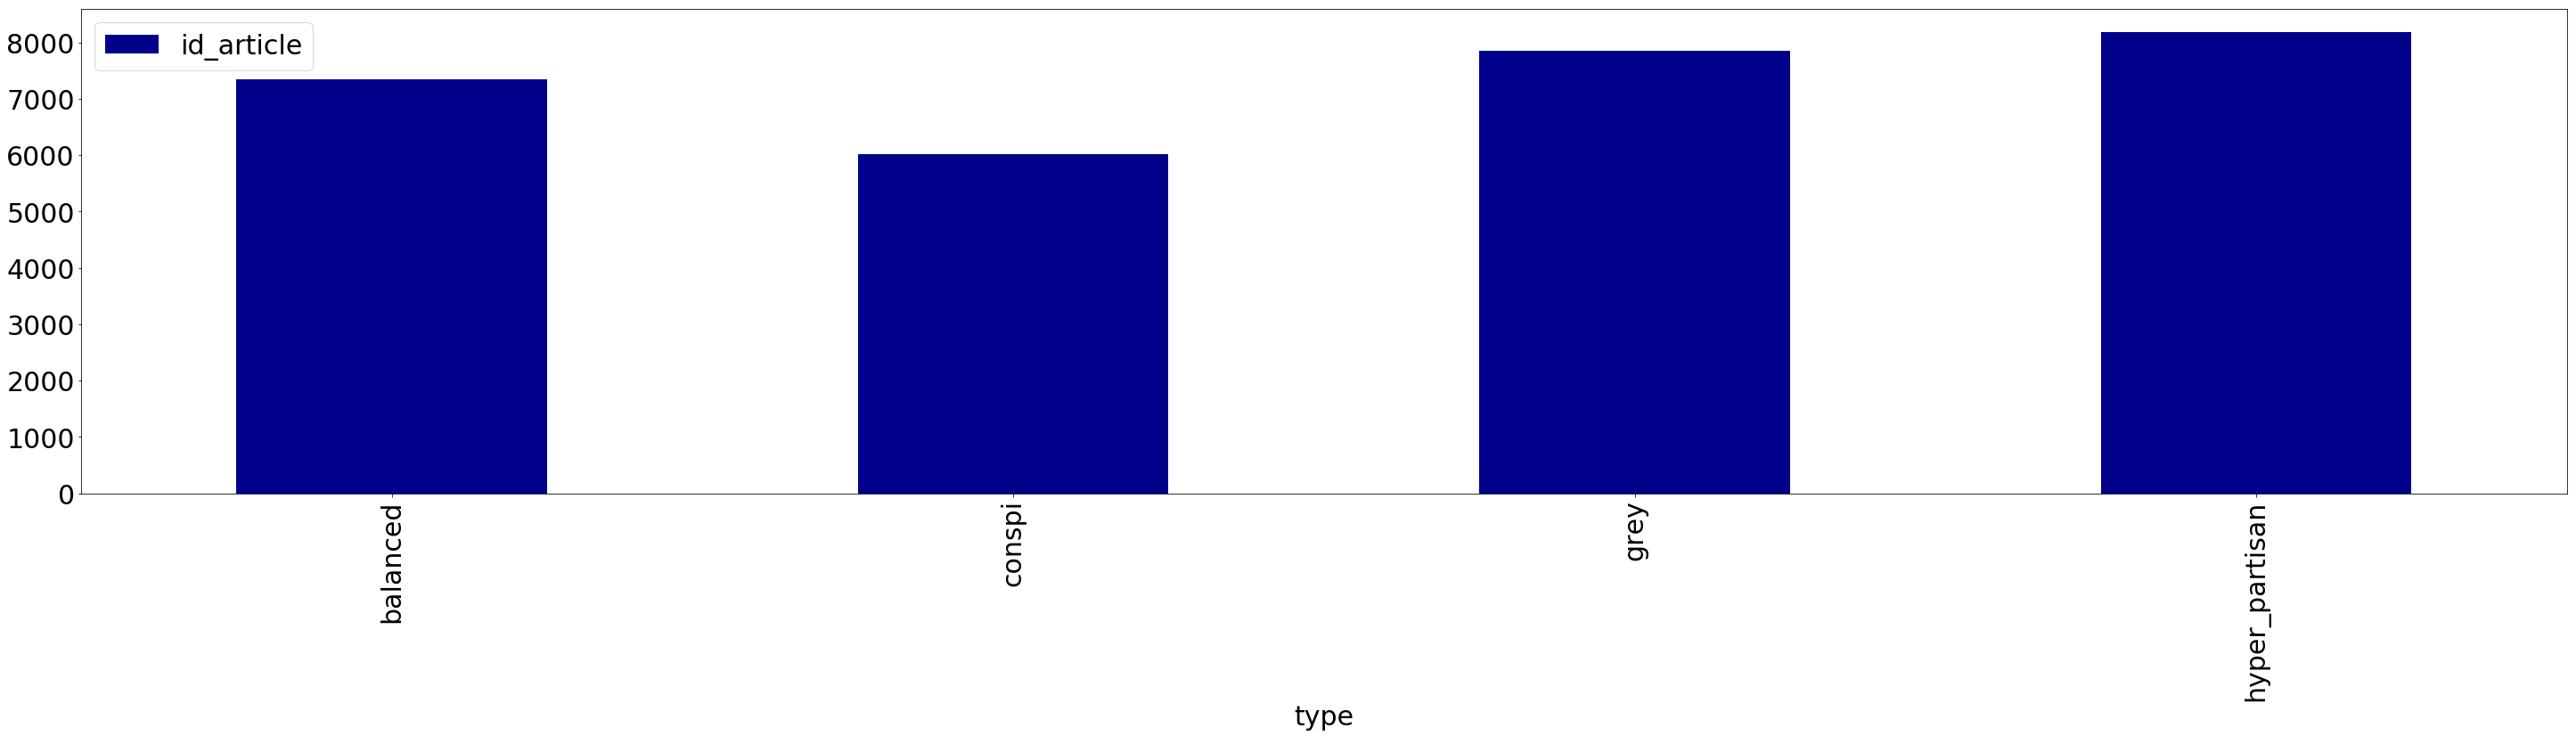

In [79]:
# number of articles per type = with autor
article_site_date_created.groupby(['type']).count()['id_article'].reset_index().plot.bar(x='type', y='id_article', color='darkblue')

In [80]:
article_site_aca = article_site.merge(article_category_article, left_on='id_article', right_on='article_id', suffixes=('_article_site','_aca'))
article_site_aca = article_site_aca.merge(article_category, left_on='article_category_id', right_on='id', suffixes=('_article_site_aca','_category'))
article_site_aca.head(5)

,id_article,site_id_article_site_aca,title,body,date_created,date_added,url,author,public_id,state,...,slug,type,last_scraped,last_processed,article_category_id,article_id,id,name_category,site_id_category,excluded
0,25338,57,A szlovénok feltörölték a padlót a litvánokkal...,"<h1 class=""prependedTitle"">A szlovénok feltörö...",2019-05-05 11:41:42,2019-05-23 22:10:59,https://24.hu/sport/2019/05/05/szlovenia-litva...,24.hu,06f6af62f7d6dbdb5e5a40e86a281789,grabbed,...,24-hu,balanced,2019-07-06 15:09:24,None,5,25338,5,Šport,NaN,0
1,25339,57,Elképesztő küzdelem árán lett újra BL-győztes ...,"<h1 class=""prependedTitle"">Elképesztő küzdelem...",2019-05-12 15:46:08,2019-05-23 22:10:59,https://24.hu/sport/2019/05/12/noi-kezilabda-b...,Aranyossy Áron,0ab3ff18f9e09224caa3fd4b6f8e54da,grabbed,...,24-hu,balanced,2019-07-06 15:09:24,None,5,25339,5,Šport,NaN,0
2,25342,57,Galéria: Elindult a Giro d'Italia | 24.hu,"<h1 class=""prependedTitle"">Galéria: Elindult a...",2019-05-12 16:45:35,2019-05-23 22:10:59,https://24.hu/sport/2019/05/12/giro-ditalia-2019/,Lugosi Péter,2fdb90571ba5433449c48b991a2fa4e6,grabbed,...,24-hu,balanced,2019-07-06 15:09:24,None,5,25342,5,Šport,NaN,0
3,25351,57,"Nincs ember, aki tartja a lépést Hosszú Katink...","<h1 class=""prependedTitle"">Nincs ember, aki ta...",2019-05-12 18:59:56,2019-05-23 22:10:59,https://24.hu/sport/2019/05/12/uszo-bajnokok-l...,24.hu,64bfb6707153a1469861cf8872f5b027,grabbed,...,24-hu,balanced,2019-07-06 15:09:24,None,5,25351,5,Šport,NaN,0
4,25356,57,"""A munkát beletettük, próbálkoztunk tisztesség...","<h1 class=""prependedTitle"">""A munkát beletettü...",2019-05-04 12:09:24,2019-05-23 22:11:00,https://24.hu/sport/2019/05/04/magyar-jegkoron...,24.hu,868cf874727a0fe259fcd5b0ec152382,grabbed,...,24-hu,balanced,2019-07-06 15:09:24,None,5,25356,5,Šport,NaN,0


In [62]:
article_site_aca.groupby(['type','name_category']).count()

id_article  \
type           name_category                                                    
balanced       (Za)biják Kamila Fily                                        2   
               1 0d 5 miliona                                               1   
               1 od 5 miliona                                              10   
               10 najboljih                                                 1   
               13. jul                                                      1   
               1561                                                         1   
               1657                                                        89   
               1658                                                        69   
               1659                                                        24   
               1660                                                         2   
               1661                                                        10   
               1663                                                         1   
               1664                                                        32   
               1667                                                         1   
               1670                                                         1   
               1674                                                        36   
               1684                                                         8   
               1688                                                        31   
               1692                                                        86   
               1707                                                        24   
               1710                                                         1   
               1713                                                         5   
               1858                                                         2   
               1927                                                         3   
               20 millió forint                                             1   
               2019-es jégkorong vb                                         1   
               2248                                                         1   
               2249                                                        70   
               2253                                                        33   
               2255                                                        10   
...                                                                       ...   
hyper_partisan „Memorialul durerii” Lucia Hossu-Longin                      1   
               „Mitingul diasporei” din 10 august 2018                      1   
               „Mulțumesc Liviu Dragnea!” Gelu Vișan                        1   
               „Nicolae Guță Magnificul”                                    1   
               „Pjat od blitve“                                             1   
               „Programul politic” al PNL alegeri europarlamen...           1   
               „Proiectul Iohannis” 2009 Crin Antonescu                     1   
               „Republica procurorilor”                                     1   
               „România ca o pradă” Radu Theodoru                           1   
               „Southwestern University of Finance and Econimics“           1   
               „The Hebrew-Khazar Correspondence in the Tenth ...           1   
               „The History of the Jewish Khazars” D. M. Dunlop             1   
               „The World History of the Jewish People” C. Roth             1   
               „Triumviratul malefic“ articol „Justițiarul”                 1   
               „Twin Peaks”                                                 1   
               „Votul urii! Nu aceasta este România visată de ...           1   
               „West Side Story”                                            1   
               „b

In [70]:
len(article_site_aca.groupby(['id_article']).count())

18572

## Labels - languages, sites, types...

In [82]:
len(article_site.groupby(['id_article']).count())

36242

In [81]:
as_al = article_site.merge(article_label, left_on='id_article', right_on='article_id', suffixes=('_as','_al'))
print(len(as_al))
as_al.head(1)

3572


,id_article,site_id,title,body,date_created_as,date_added,url,author,public_id,state,...,id,article_id,user_id,date_created_al,path,content,parent_content,offset,length,html_label
0,43745,57,"Orbán: Magyarországon sajtószabadság van, nyug...","<h1 class=""prependedTitle"">Orbán: Magyarország...",2019-05-24 17:53:56,2019-05-24 18:30:07,https://24.hu/kozelet/2019/05/24/orban-interju...,Kerner Zsolt,df120701332ae40dcf124da2b171a667,labeled,...,18373,43745,6,2019-06-04 12:17:55,1:0,Orbán:,"Orbán: Magyarországon sajtószabadság van, nyug...",0,6,"[""<span class=\""savedTag highlighted labelCat..."


In [83]:
print(len(label_article_label))
label_article_label.head(1)

2303


,label_id,article_label_id
0,31,1030


In [84]:
as_al_lal = as_al.merge(label_article_label, left_on='id', right_on='article_label_id', suffixes=('_asal','_lal'))
print(len(as_al_lal))
as_al_lal.head(1)

2303


,id_article,site_id,title,body,date_created_as,date_added,url,author,public_id,state,...,user_id,date_created_al,path,content,parent_content,offset,length,html_label,label_id,article_label_id
0,43745,57,"Orbán: Magyarországon sajtószabadság van, nyug...","<h1 class=""prependedTitle"">Orbán: Magyarország...",2019-05-24 17:53:56,2019-05-24 18:30:07,https://24.hu/kozelet/2019/05/24/orban-interju...,Kerner Zsolt,df120701332ae40dcf124da2b171a667,labeled,...,6,2019-06-04 12:17:55,1:0,Orbán:,"Orbán: Magyarországon sajtószabadság van, nyug...",0,6,"[""<span class=\""savedTag highlighted labelCat...",31,18373


In [85]:
label.head(1)

,id,created_by,category_id,name,description,created_date
0,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07


In [86]:
as_al_lal_l = as_al_lal.merge(label, left_on='label_id', right_on='id', suffixes=('_asal','_lal'))
print(len(as_al_lal_l))
as_al_lal_l.head(1)

2303


,id_article,site_id,title,body,date_created_as,date_added,url,author,public_id,state,...,length,html_label,label_id,article_label_id,id_lal,created_by,category_id,name_lal,description,created_date
0,43745,57,"Orbán: Magyarországon sajtószabadság van, nyug...","<h1 class=""prependedTitle"">Orbán: Magyarország...",2019-05-24 17:53:56,2019-05-24 18:30:07,https://24.hu/kozelet/2019/05/24/orban-interju...,Kerner Zsolt,df120701332ae40dcf124da2b171a667,labeled,...,6,"[""<span class=\""savedTag highlighted labelCat...",31,18373,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07


In [87]:
df = as_al_lal_l.copy()

### df ALL

In [88]:
pd.set_option('display.max_columns', None)
df.head(1)

,id_article,site_id,title,body,date_created_as,date_added,url,author,public_id,state,original_body,text_body,language_article,date_created_year,id_site,name_asal,enabled,host,language_site,proto,slug,type,last_scraped,last_processed,id_asal,article_id,user_id,date_created_al,path,content,parent_content,offset,length,html_label,label_id,article_label_id,id_lal,created_by,category_id,name_lal,description,created_date
0,43745,57,"Orbán: Magyarországon sajtószabadság van, nyug...","<h1 class=""prependedTitle"">Orbán: Magyarország...",2019-05-24 17:53:56,2019-05-24 18:30:07,https://24.hu/kozelet/2019/05/24/orban-interju...,Kerner Zsolt,df120701332ae40dcf124da2b171a667,labeled,"<head>\n<meta charset=""UTF-8"">\n<meta name=""vi...","Orbán: Magyarországon sajtószabadság van, nyug...",hu,2019.0,57,24.hu,1,24.hu,hu,https://,24-hu,balanced,2019-07-06 15:09:24,None,18373,43745,6,2019-06-04 12:17:55,1:0,Orbán:,"Orbán: Magyarországon sajtószabadság van, nyug...",0,6,"[""<span class=\""savedTag highlighted labelCat...",31,18373,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07


In [89]:
len(df)

2303

### how many labels per language

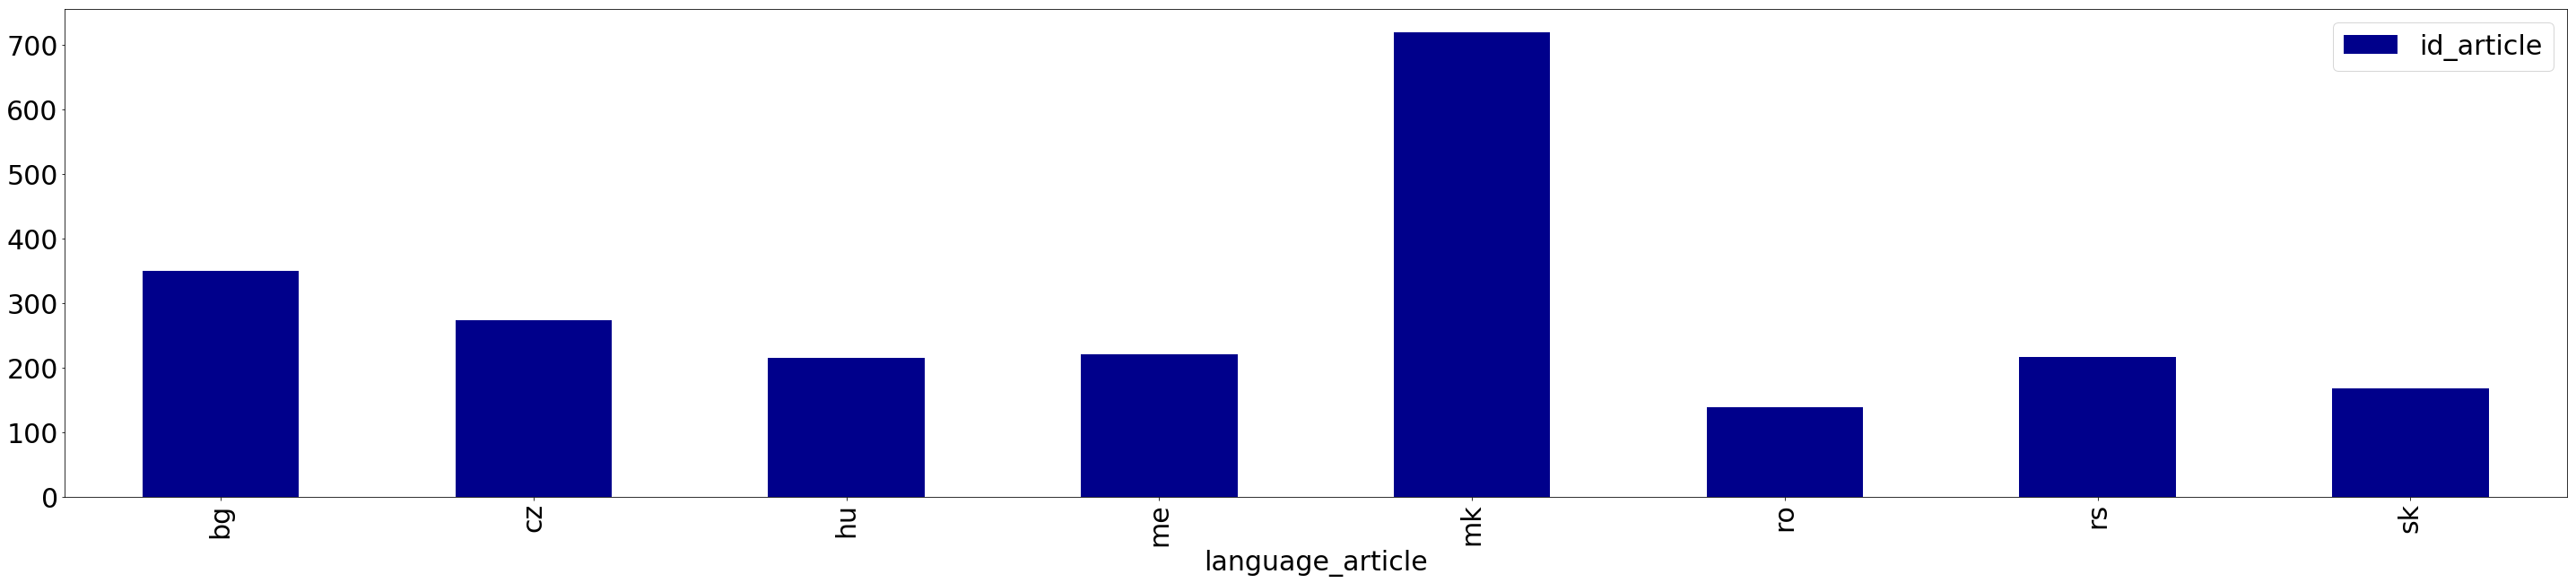

In [109]:
# how many labels per language
df.groupby(['language_article']).count()['id_article'].reset_index().plot.bar(x='language_article', y='id_article', color='darkblue')

### how many labeled articles per language

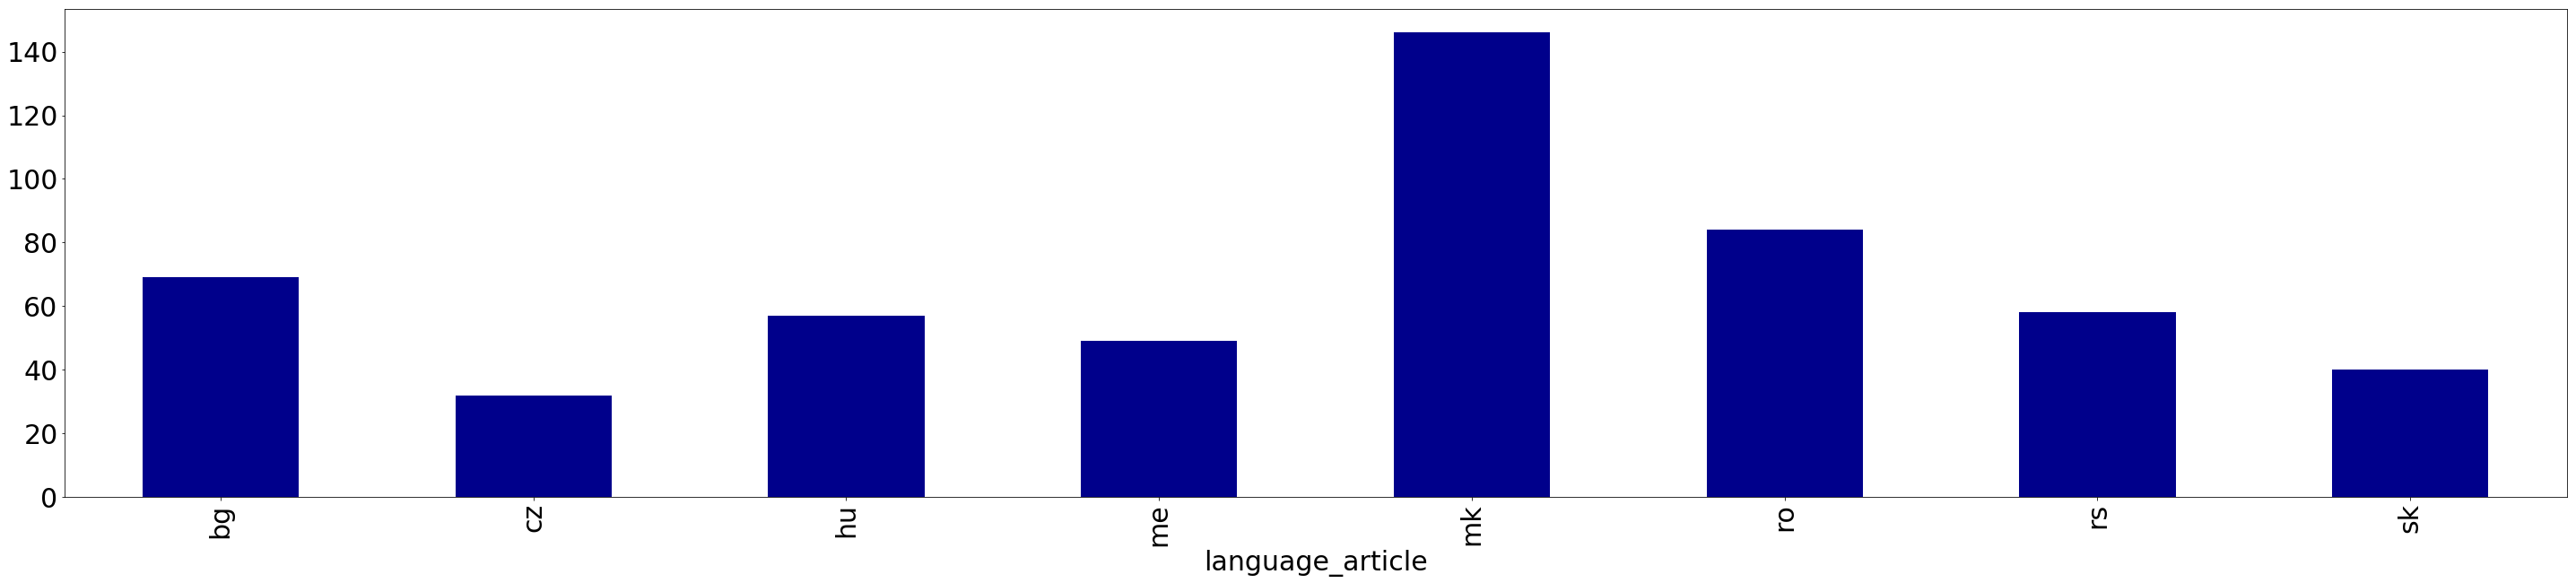

In [111]:
# how many labeled articles per language
df.groupby(['language_article','id_article']).count()['url'].reset_index().groupby(['language_article']).count()['id_article'].plot.bar(x='language_article', y='id_article', color='darkblue')

### how many labeled sites per language

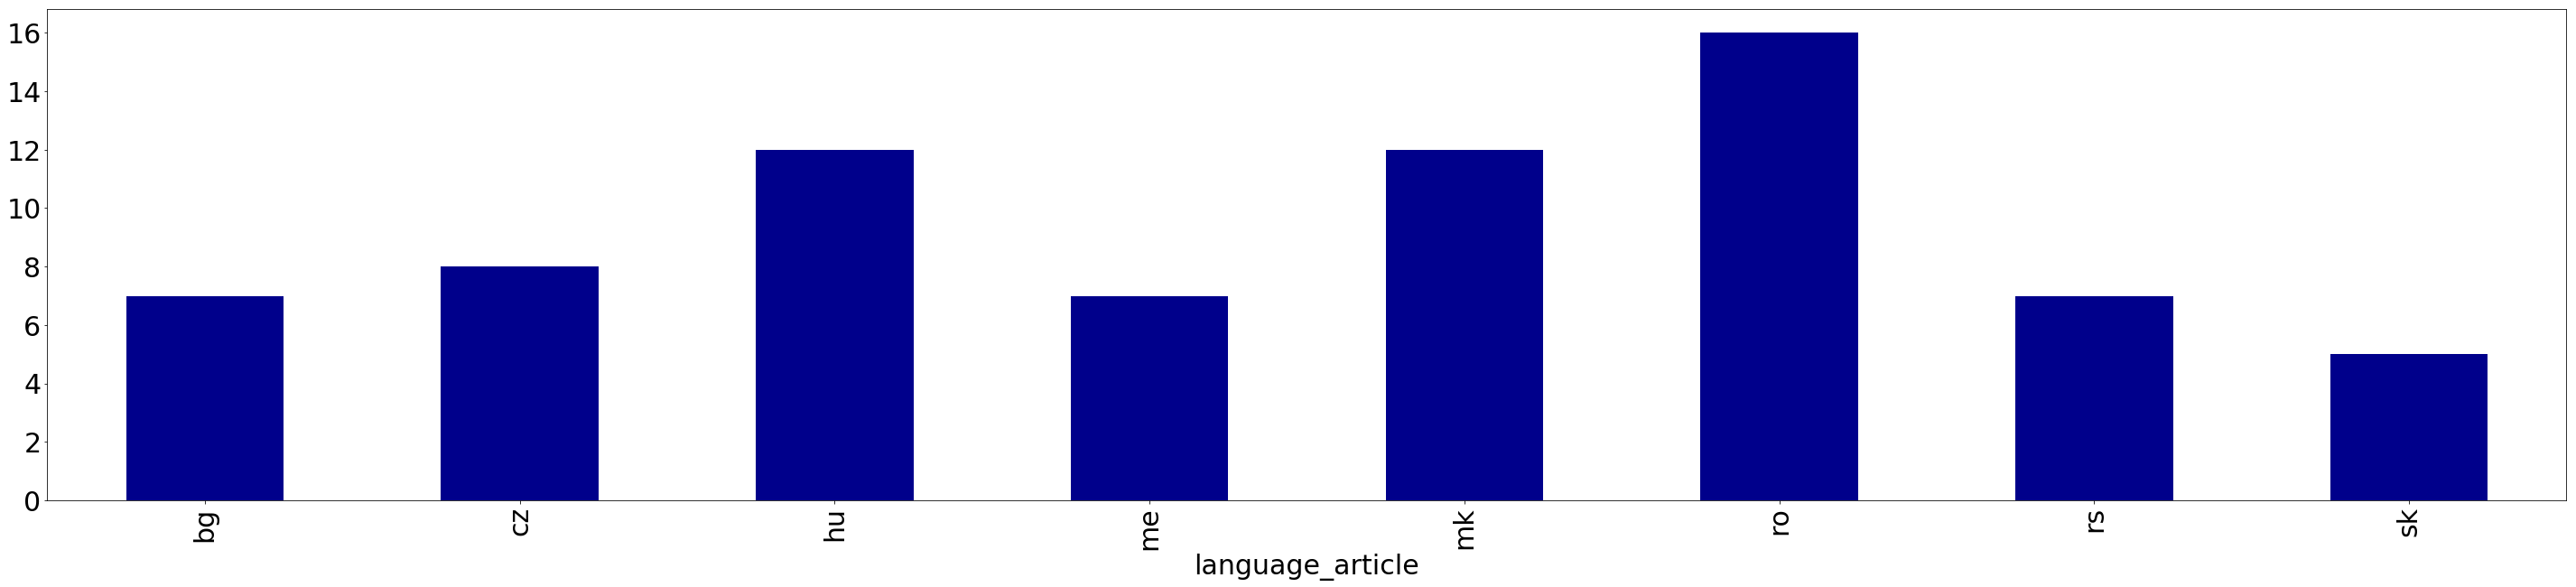

In [112]:
# how many labeled sites per language
df.groupby(['language_article','site_id']).count()['url'].reset_index().groupby(['language_article']).count()['site_id'].plot.bar(x='language_article', y='site_id', color='darkblue')

### how many labeled articles per type

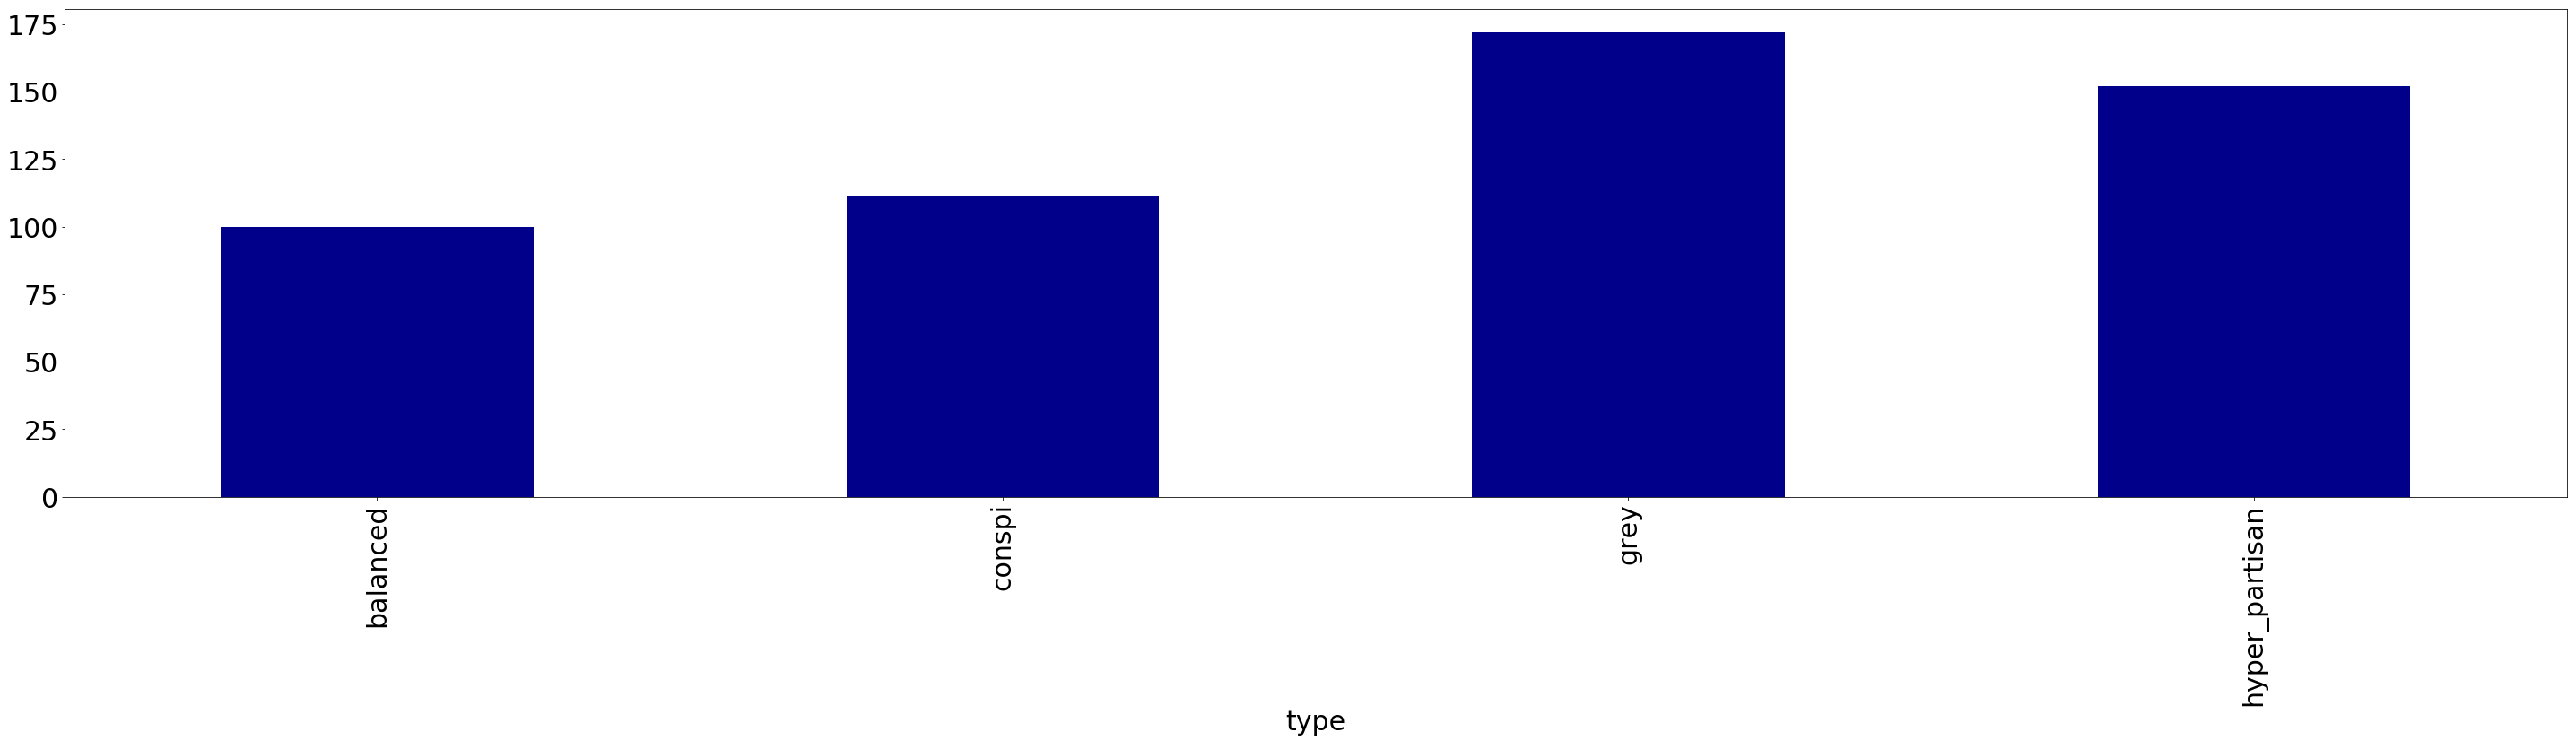

In [130]:
# how many labeled articles per type
df.groupby(['type','id_article']).count()['url'].reset_index().groupby(['type']).count()['id_article'].plot.bar(x='type', y='id_article', color='darkblue')

### how many labeled sites per types

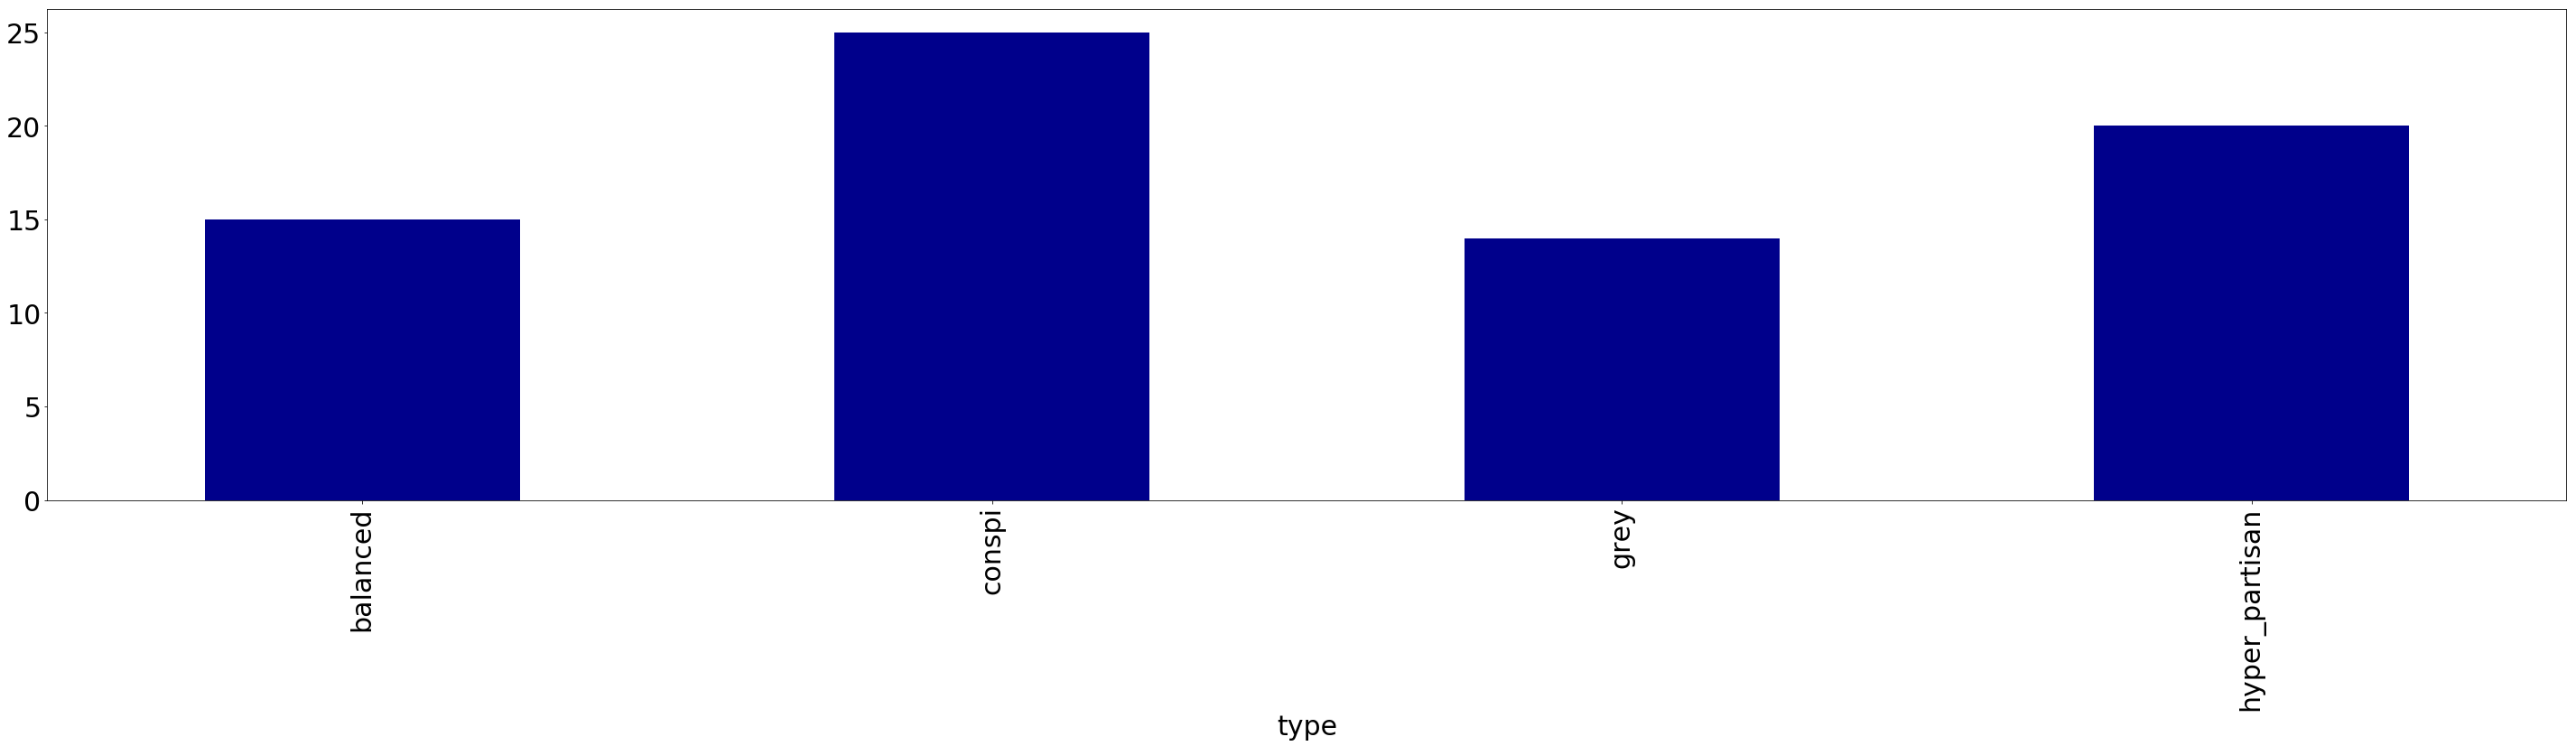

In [129]:
# how many labeled sites per types
df.groupby(['type','site_id']).count()['url'].reset_index().groupby(['type']).count()['site_id'].plot.bar(x='type', y='site_id', color='darkblue')

## How many duplicates in labels

In [99]:
print(len(df[['content','offset','length']]) - len(df[['content','offset','length']].drop_duplicates()))

201


### SK labels

- category_id
- name_lal

In [96]:
# slovak labels
df[df['language_article'] == 'sk']

,id_article,site_id,title,body,date_created_as,date_added,url,author,public_id,state,original_body,text_body,language_article,date_created_year,id_site,name_asal,enabled,host,language_site,proto,slug,type,last_scraped,last_processed,id_asal,article_id,user_id,date_created_al,path,content,parent_content,offset,length,html_label,label_id,article_label_id,id_lal,created_by,category_id,name_lal,description,created_date
7,35861,62,"Moskva kritizuje nemecké médiá, vraj písali pr...","<h1 class=""prependedTitle"">Moskva kritizuje ne...",2019-05-23 20:15:00,2019-05-23 23:30:23,https://www.aktuality.sk/clanok/694752/moskva-...,None,cab4d51f9b54c2e471e65838e61f871b,labeled,<!--<![endif]--><head>\n<!-- Google Tag Manage...,"Moskva kritizuje nemecké médiá, vraj písali pr...",sk,2019.0,62,aktuality.sk,1,www.aktuality.sk,sk,https://,aktuality-sk,balanced,2019-07-06 15:09:51,None,23017,35861,21,2019-06-06 08:29:54,1:0,"kritizuje nemecké médiá, vraj písali protirus...","Moskva kritizuje nemecké médiá, vraj písali pr...",0,62,"[""<span class=\""savedTag highlighted labelCat...",31,23017,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07
8,47448,62,Medzinárodný tribunál: Rusko musí prepustiť uk...,"<h1 class=""prependedTitle"">Medzinárodný tribun...",2019-05-25 12:15:00,2019-05-25 13:30:17,https://www.aktuality.sk/clanok/695148/medzina...,None,82c98031ee79dc2db3d8e12045f190ac,labeled,<!--<![endif]--><head>\n<!-- Google Tag Manage...,Medzinárodný tribunál: Rusko musí prepustiť uk...,sk,2019.0,62,aktuality.sk,1,www.aktuality.sk,sk,https://,aktuality-sk,balanced,2019-07-06 15:09:51,None,8178,47448,21,2019-05-31 09:11:26,1:0,Medzinárodný tribunál: Rusko musí prepustiť uk...,Medzinárodný tribunál: Rusko musí prepustiť uk...,0,72,"[""<span class=\""savedTag highlighted labelCat...",31,8178,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07
9,51122,62,Rusi stopli kazašské dodávky uhlia a LPG na Uk...,"<h1 class=""prependedTitle"">Rusi stopli kazašsk...",2019-05-27 19:28:00,2019-05-29 10:32:22,https://www.aktuality.sk/clanok/695765/rusi-st...,None,8c026b9fb6f1a770ba2224970ddf4325,labeled,<!--<![endif]--><head>\n<!-- Google Tag Manage...,Rusi stopli kazašské dodávky uhlia a LPG na Uk...,sk,2019.0,62,aktuality.sk,1,www.aktuality.sk,sk,https://,aktuality-sk,balanced,2019-07-06 15:09:51,None,8049,51122,21,2019-05-31 08:28:29,1:0,Rusi stopli kazašské dodávky uhlia a LPG na Uk...,Rusi stopli kazašské dodávky uhlia a LPG na Uk...,0,52,"[""<span class=\""savedTag highlighted labelCat...",31,8049,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07
10,51145,62,Japonsko plánuje od USA kúpiť 105 stíhačiek F-35,"<h1 class=""prependedTitle"">Japonsko plánuje od...",2019-05-27 07:20:00,2019-05-29 10:32:24,https://www.aktuality.sk/clanok/695489/japonsk...,None,c054aa9ccc267ddd24798b096bd15b18,labeled,<!--<![endif]--><head>\n<!-- Google Tag Manage...,Japonsko plánuje od USA kúpiť 105 stíhačiek F-...,sk,2019.0,62,aktuality.sk,1,www.aktuality.sk,sk,https://,aktuality-sk,balanced,2019-07-06 15:09:51,None,14407,51145,21,2019-06-03 12:47:12,1:0,Japonsko plánuje od USA kúpiť 105 stíhačiek F-35,Japonsko plánuje od USA kúpiť 105 stíhačiek F-35,0,48,"[""<span class=\""savedTag highlighted labelCat...",31,14407,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07
11,55877,62,Poľsko vo veci nákupu moderných stíhačiek oslo...,"<h1 class=""prependedTitle"">Poľsko vo veci náku...",2019-05-29 10:15:00,2019-05-29 13:30:44,https://www.aktuality.sk/clanok/696203/polsko-...,None,eab75d7f64b81493151e996d8c36447e,labeled,<!--<![endif]--><head>\n<!-- Google Tag Manage...,Poľsko vo veci nákupu moderných stíhačiek oslo...,sk,2019.0,62,aktuality.sk,1,www.aktuality.sk,sk,https://,aktuality-sk,balanced,2019-07-06 15:09:51,None,2509,55877,21,2019-05-30 08:52:52,1:0,vo veci nákupu moderných stíhačiek oslovilo p...,Poľsko vo veci nákupu moderných stíha

In [151]:
df[(df['language_article'] == 'cz') & (df['category_id'].isin([6]))]

,id_article,site_id,title,body,date_created_as,date_added,url,author,public_id,state,original_body,text_body,language_article,date_created_year,id_site,name_asal,enabled,host,language_site,proto,slug,type,last_scraped,last_processed,id_asal,article_id,user_id,date_created_al,path,content,parent_content,offset,length,html_label,label_id,article_label_id,id_lal,created_by,category_id,name_lal,description,created_date
4,54334,38,"AC24.cz - Rusko a Sýrie vyzvaly svět a OSN, ab...","<h1 class=""prependedTitle"">AC24.cz - Rusko a S...",2019-05-29 09:27:00,2019-05-29 12:30:19,https://ac24.cz/-/rusko-a-syrie-vyzvaly-svet-a...,Redakce AC24,cb4a0bcd698aabed1ef642bbc98a271e,labeled,<head>\n<!--iBB Ad Server Asyn code--><script ...,"AC24.cz - Rusko a Sýrie vyzvaly svět a OSN, ab...",cz,2019.0,38,ac24.cz,1,ac24.cz,cz,https://,ac24-cz,conspi,2019-07-06 15:06:55,None,6621,54334,4,2019-05-31 06:41:15,1:1,Rusko,"AC24.cz - Rusko a Sýrie vyzvaly svět a OSN, ab...",10,6,"[""<span class=\""savedTag highlighted labelCat...",31,6621,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07
5,54334,38,"AC24.cz - Rusko a Sýrie vyzvaly svět a OSN, ab...","<h1 class=""prependedTitle"">AC24.cz - Rusko a S...",2019-05-29 09:27:00,2019-05-29 12:30:19,https://ac24.cz/-/rusko-a-syrie-vyzvaly-svet-a...,Redakce AC24,cb4a0bcd698aabed1ef642bbc98a271e,labeled,<head>\n<!--iBB Ad Server Asyn code--><script ...,"AC24.cz - Rusko a Sýrie vyzvaly svět a OSN, ab...",cz,2019.0,38,ac24.cz,1,ac24.cz,cz,https://,ac24-cz,conspi,2019-07-06 15:06:55,None,6622,54334,4,2019-05-31 06:41:15,1:3,Sýrie,"AC24.cz - Rusko a Sýrie vyzvaly svět a OSN, ab...",2,6,"[""<span class=\""savedTag highlighted labelCat...",31,6622,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07
12,51234,77,"Chci zabránit sebevraždě EU, tvrdí Vondra, kte...","<h1 class=""prependedTitle"">Chci zabránit sebev...",2019-05-27 17:57:57,2019-05-29 10:32:34,https://zpravy.aktualne.cz/domaci/volby-do-evr...,None,683f68bc6377bbf435f7c4b1014f5772,labeled,"<head>\n<meta charset=""utf-8"">\n<meta name=""re...","Chci zabránit sebevraždě EU, tvrdí Vondra, kte...",cz,2019.0,77,aktualne.cz,1,www.aktualne.cz,cz,https://,aktualne-cz,balanced,2019-07-06 16:01:34,None,10834,51234,4,2019-06-01 14:17:56,1:1,sebevraždě EU,"Chci zabránit sebevraždě EU, tvrdí Vondra, kte...",14,13,"[""<span class=\""savedTag highlighted labelCat...",31,10834,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07
13,51250,77,Europoslanec SPD Hynek Blaško: Nejsem kůň Mosk...,"<h1 class=""prependedTitle"">Europoslanec SPD Hy...",2019-05-29 07:53:42,2019-05-29 10:32:35,https://zpravy.aktualne.cz/domaci/volby-do-evr...,None,96ce08ea9aacb5d23e7b4593d741fa84,labeled,"<head>\n<meta charset=""utf-8"">\n<meta name=""re...",Europoslanec SPD Hynek Blaško: Nejsem kůň Mosk...,cz,2019.0,77,aktualne.cz,1,www.aktualne.cz,cz,https://,aktualne-cz,balanced,2019-07-06 16:01:34,None,6839,51250,4,2019-05-31 07:05:47,1:1,Moskvy,Europoslanec SPD Hynek Blaško: Nejsem kůň Mosk...,42,7,"[""<span class=\""savedTag highlighted labelCat...",31,6839,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07
32,52767,39,"„Evropské totalitní elity se jen tak nevzdají,...","<h1 class=""prependedTitle"">„Evropské totalitní...",2019-05-27 12:15:00,2019-05-29 11:32:12,https://cz.sputniknews.com/ceskarepublika/2019...,None,2e8e5f8940cc1b726147c0a2ba213778,labeled,<head>\n<title>„Evropské totalitní elity se je...,"„Evropské totalitní elity se jen tak nevzdají,...",cz,2019.0,39,cz.sputniknews.com,1,cz.sputniknews.com,cz,https://,cz-sputniknews-com,hyper_partisan,2019-07-06 15:06:56,None,11001,52767,4,2019-06-01 14:54:10,1:1,Evropské totalitní elity,"„Evropské totalitní elity se jen tak nevzdají,...",1,24,"[""<span class=\""savedTag highlighted labelCat...",31,11001,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07
33,52781,

### Slovak articles: how many labels per article

In [124]:
# slovak labels / articles
df[df['language_article'] == 'sk'].groupby(['id_article','name_asal']).count()['site_id'].reset_index().sort_values(by=['site_id'])

,id_article,name_asal,site_id
33,53842,hnonline,1
1,36426,Hlavné správy,1
27,51158,aktuality.sk,1
37,55878,aktuality.sk,1
4,39334,Hlavné správy,1
18,47648,Slobodný Vysielač,1
6,40642,Hlavné správy,1
7,40984,aktuality.sk,1
16,47163,hnonline,1
28,51162,aktuality.sk,1


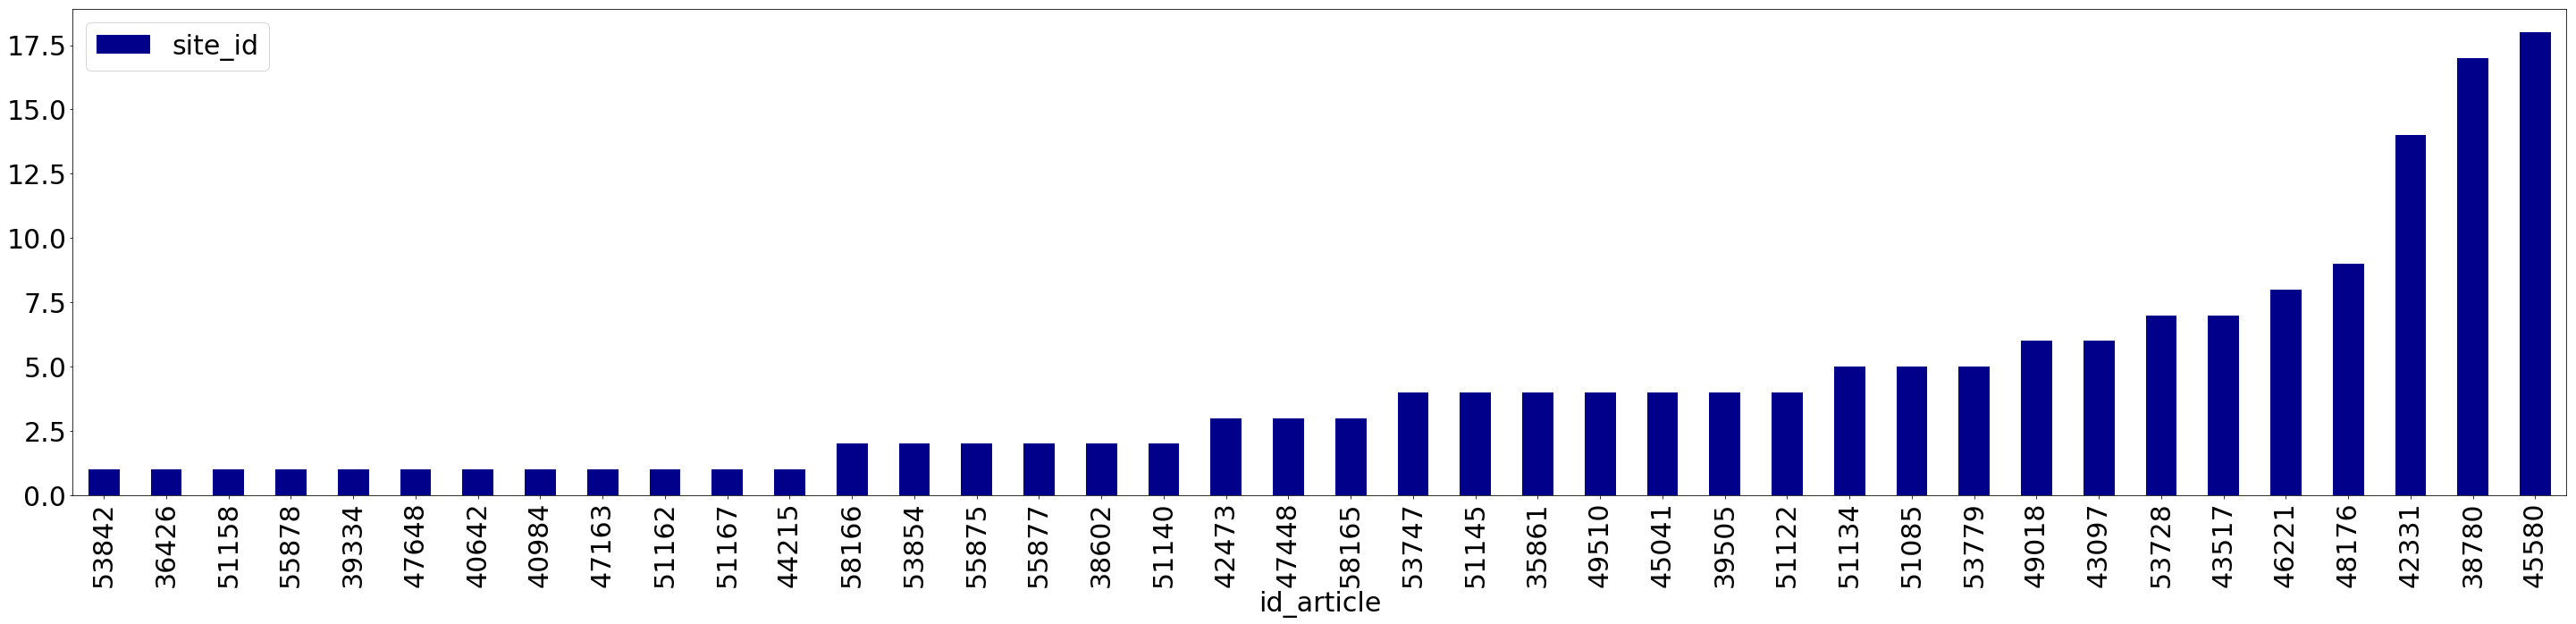

In [126]:
# slovak labels pre article
df[df['language_article'] == 'sk'].groupby(['id_article','name_asal']).count()['site_id'].reset_index().sort_values(by=['site_id']).plot.bar(x='id_article', y='site_id', color='darkblue')

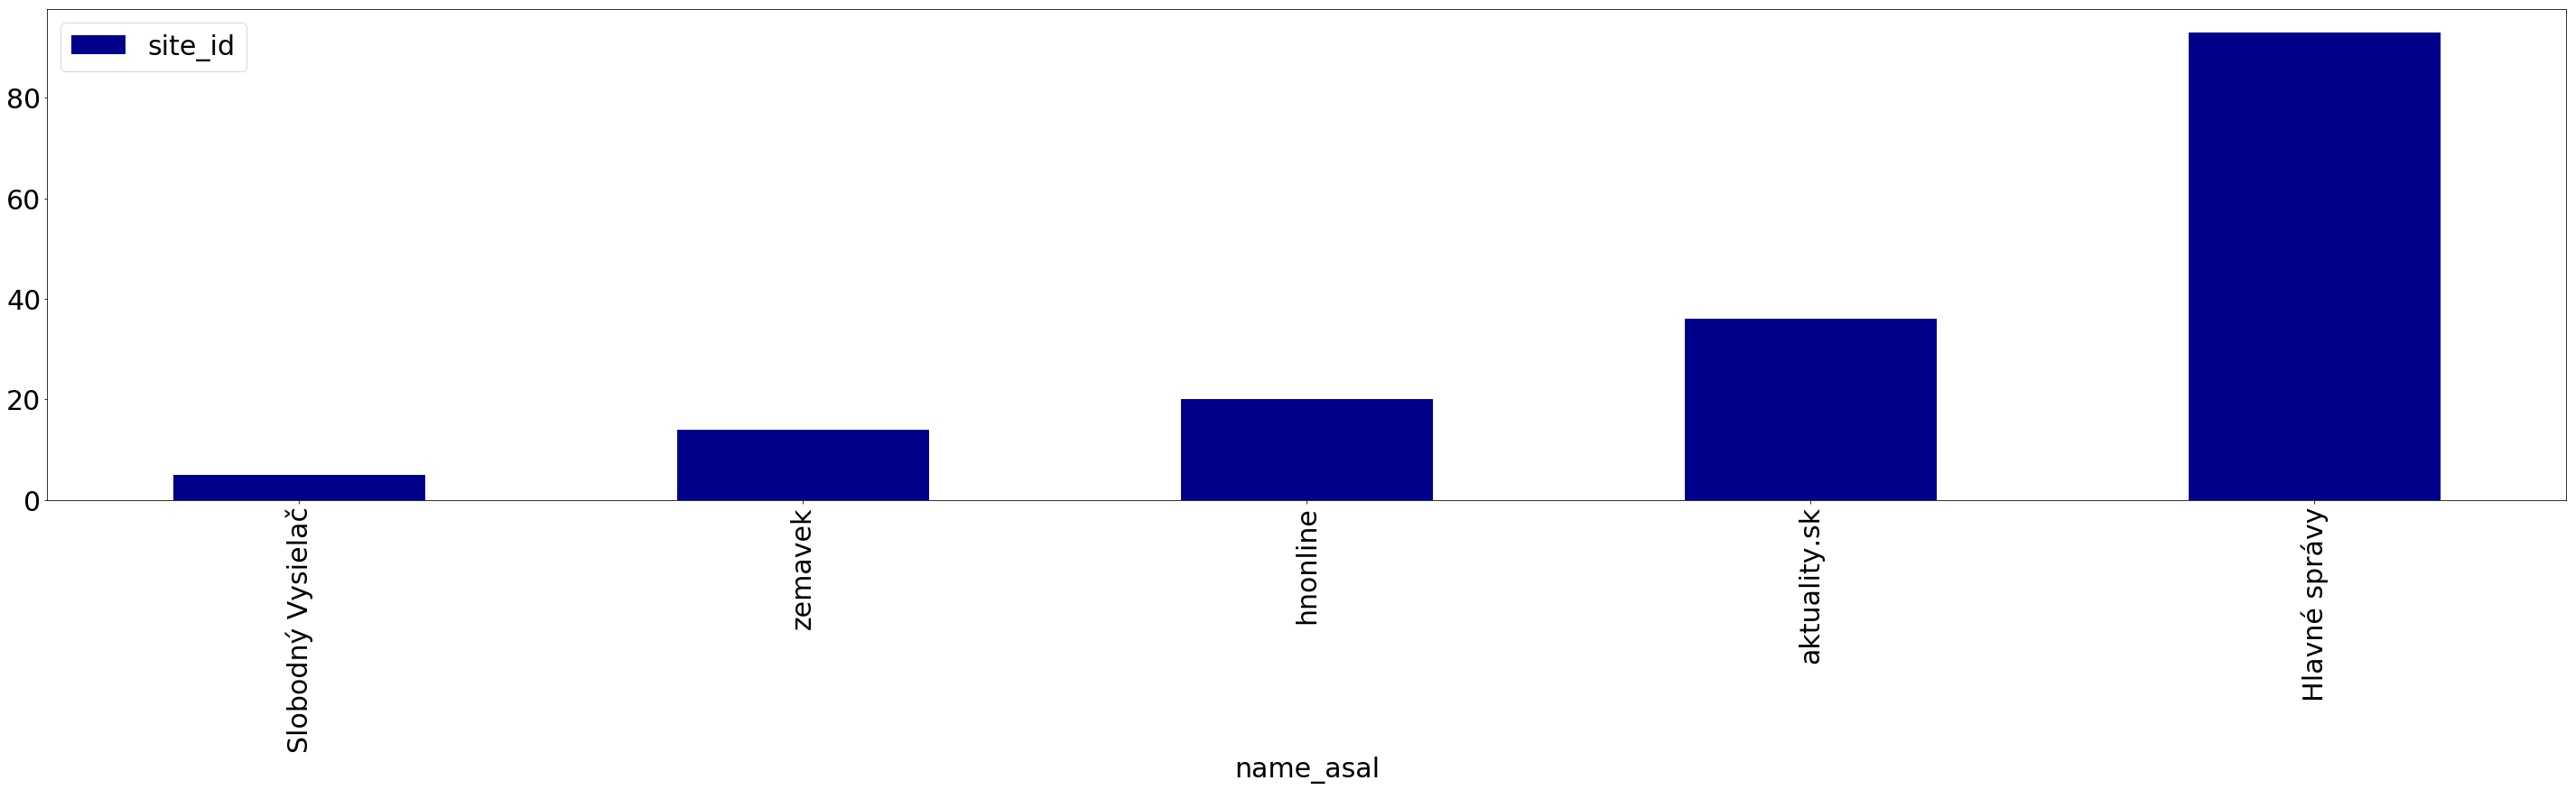

In [128]:
# slovak labels pre site
df[df['language_article'] == 'sk'].groupby(['name_asal']).count()['site_id'].reset_index().sort_values(by=['site_id']).plot.bar(x='name_asal', y='site_id', color='darkblue')

## Labels

### categories of labels: how many labels in them

In [133]:
df.groupby(['category_id']).count()['site_id']

category_id
5       39
6      279
8      244
9      165
11    1576
Name: site_id, dtype: int64

In [135]:
label.head(6)

,id,created_by,category_id,name,description,created_date
0,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07
1,37,None,5,3 Russia as a protector of traditional values,"Russia, conservative society, birth rates, dem...",2019-05-09 10:56:29
2,52,None,8,1 USA as manipulator and devious actor,"US funding, subversive influence through NGOs,...",2019-05-15 13:01:15
3,54,None,9,2 EU dictate,"Brussel’s dictate, lack of democratic accounta...",2019-05-15 13:03:32
4,64,None,6,Unsure,"If you're unsure about a narrative, article or...",2019-05-17 13:58:32
5,70,None,11,Afghanistan,None,2019-05-27 14:46:04


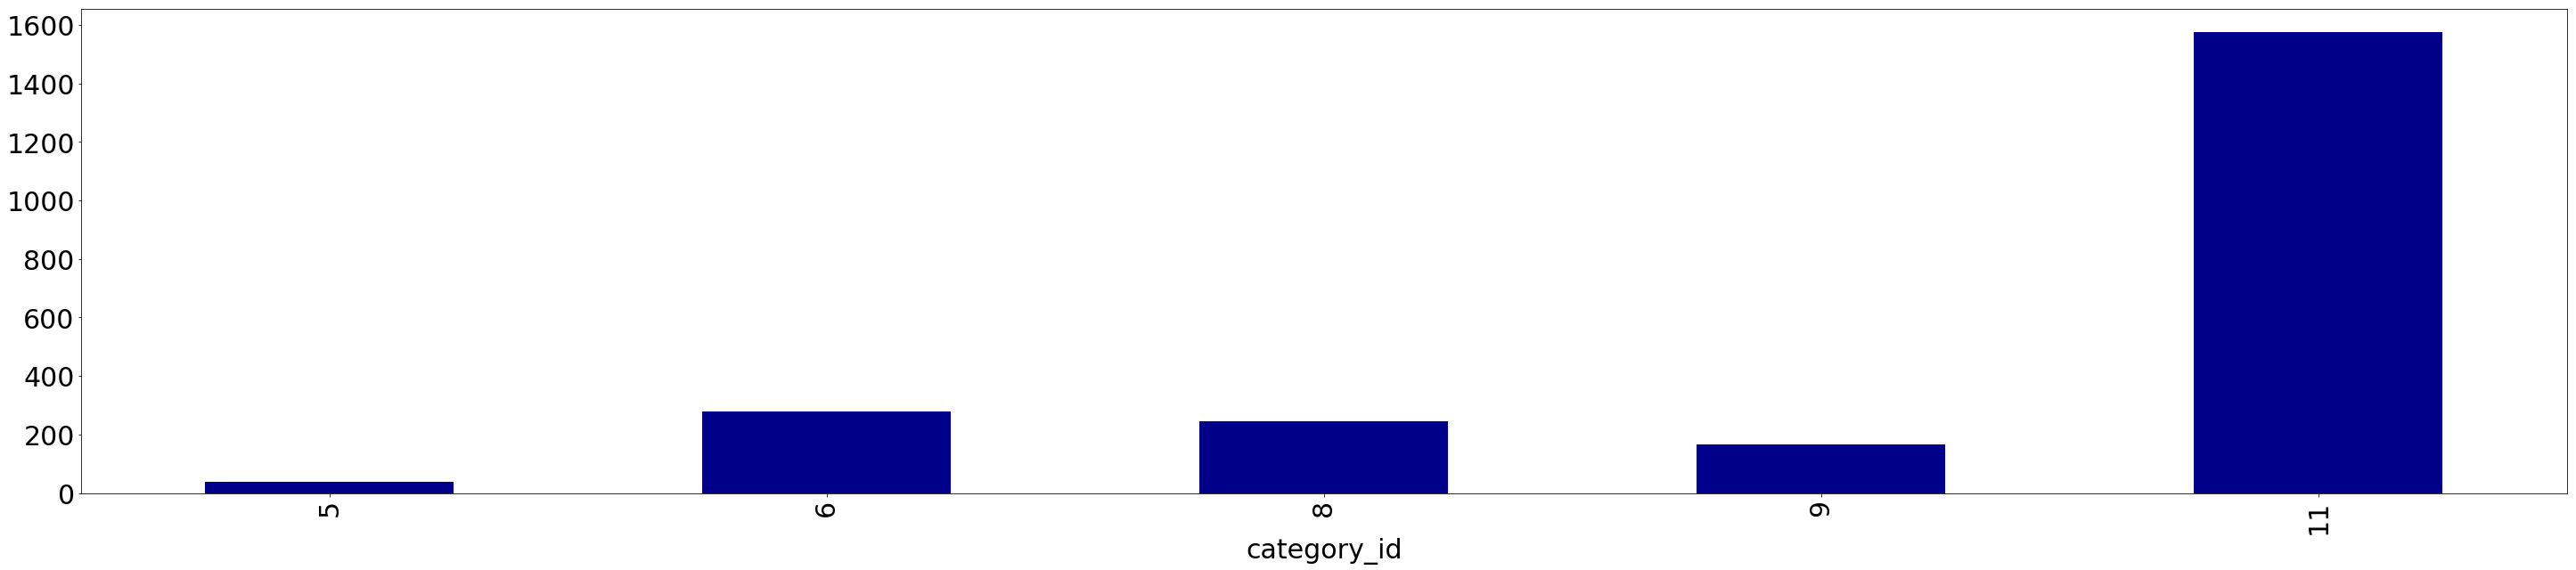

In [136]:
df.groupby(['category_id']).count()['site_id'].plot.bar(x='name_asal', y='site_id', color='darkblue')

## Hist of the lenght

In [137]:
df.head(1)

,id_article,site_id,title,body,date_created_as,date_added,url,author,public_id,state,original_body,text_body,language_article,date_created_year,id_site,name_asal,enabled,host,language_site,proto,slug,type,last_scraped,last_processed,id_asal,article_id,user_id,date_created_al,path,content,parent_content,offset,length,html_label,label_id,article_label_id,id_lal,created_by,category_id,name_lal,description,created_date
0,43745,57,"Orbán: Magyarországon sajtószabadság van, nyug...","<h1 class=""prependedTitle"">Orbán: Magyarország...",2019-05-24 17:53:56,2019-05-24 18:30:07,https://24.hu/kozelet/2019/05/24/orban-interju...,Kerner Zsolt,df120701332ae40dcf124da2b171a667,labeled,"<head>\n<meta charset=""UTF-8"">\n<meta name=""vi...","Orbán: Magyarországon sajtószabadság van, nyug...",hu,2019.0,57,24.hu,1,24.hu,hu,https://,24-hu,balanced,2019-07-06 15:09:24,None,18373,43745,6,2019-06-04 12:17:55,1:0,Orbán:,"Orbán: Magyarországon sajtószabadság van, nyug...",0,6,"[""<span class=\""savedTag highlighted labelCat...",31,18373,31,None,6,Headline,Use when the identified narrative occurs in he...,2019-05-05 18:59:07


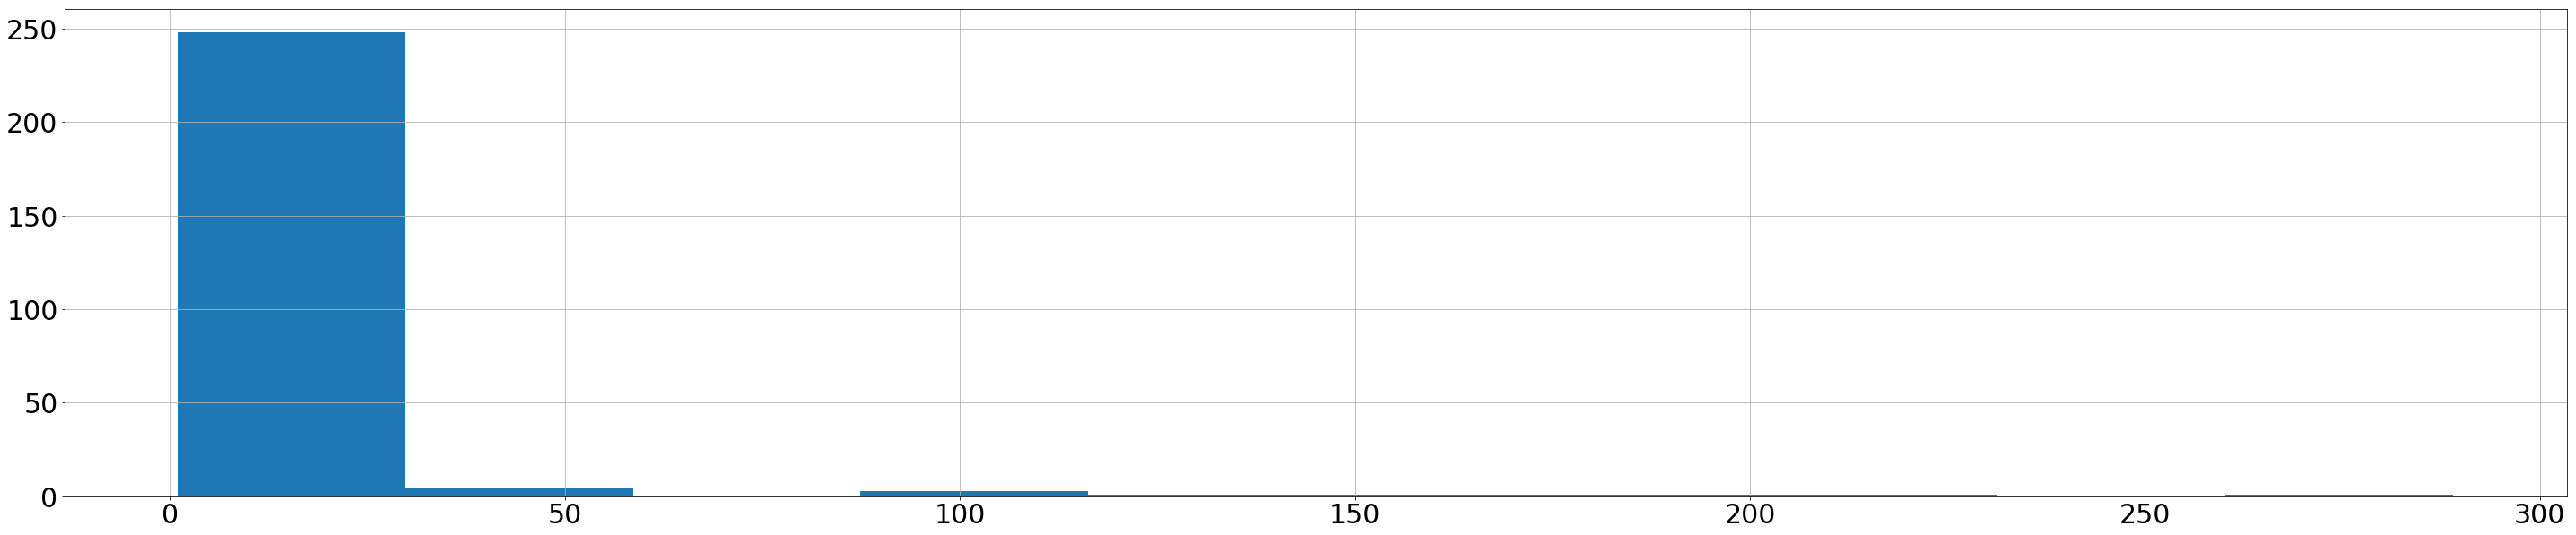

In [141]:
df.groupby(['length']).count()['id_article'].hist(bins=10)

# Questions

RSS?

Consistency in labelling? (e.g. languages)

What are the country labels good for?

In [102]:
df[df['category_id'] == 11]['content'].drop_duplicates()

253            Magyarországon
254                 Maďarsku 
256                 Maďarsko 
257                 Mađarskoj
258                Mađarskoj,
259                   Унгария
262                  Унгария 
263                Maďarskem 
264              Viktor Orbán
265              Magyarország
266              Magyarország
267                    magyar
268                  Унгарија
269                   Унгариј
270                   Ungaria
271                  Унгарија
272                    magyar
273                унгарскиот
276              Виктор Орбан
277                  Mađarska
282                  Maďarsko
283                  Maďarska
535            Великобритания
537                Тереза Мей
538                       Меј
539                 Британија
541         Velikoj Britaniji
542                  Británii
543            Velké Británii
544          Velika Britanija
                ...          
2270                    Svájc
2271             Палестинците
2272      

Headlines - why manual labelling?

In [103]:
df[df['category_id'] == 6]['content'].drop_duplicates()

0                                                  Orbán:
1       Русия премахна забраната за внос \nна череши и...
2       Руската ракета "Союз", ударена от мълния, успе...
3       Обвиненията срещу Асанж - опасен прецедент за ...
4                                                  Rusko 
5                                                  Sýrie 
6       Criza din Kosovo s-a aplanat după intervenția ...
7        kritizuje nemecké médiá, vraj písali protirus...
8       Medzinárodný tribunál: Rusko musí prepustiť uk...
9       Rusi stopli kazašské dodávky uhlia a LPG na Uk...
10       Japonsko plánuje od USA kúpiť 105 stíhačiek F-35
11       vo veci nákupu moderných stíhačiek oslovilo p...
12                                          sebevraždě EU
13                                                Moskvy 
14           Vučić upozorio: Ovo je konačni cilj Prištine
15                        Vučić upozorio: Ovo je konačni 
16      I zvanično: Preporučen početak pregovora EU sa...
17      Dačić:

Automatic detection of narratives?